In [1]:
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning) 

import pandas as pd
import numpy as np

random_seed = 3

In [2]:
sales = pd.read_csv('data/storesalesdata.csv')
sales.shape

(116232, 13)

In [3]:
info = pd.read_csv('data/storeinformation.csv')
info.shape

(95, 6)

In [4]:
demo = pd.read_csv('data/storedemographicdata.csv')
demo.shape

(95, 45)

---

# Data Preparation

In [5]:
info.Type.value_counts()

Existing    85
New         10
Name: Type, dtype: int64

In [6]:
stores_exist = info[info.Type == 'Existing']
stores_exist.shape

(85, 6)

In [7]:
stores_new = info[info.Type == 'New']
stores_new.shape

(10, 6)

In [8]:
pd.merge(sales, stores_new, on='Store').shape[0]

0

The sales data only includes sales from existing stores - that makes intuitive sense!

---

Finally, we need to load the cluster data:

In [9]:
clusters = pd.read_csv('data/task1-clusters.csv').Cluster.values

In [10]:
sales_data = pd.read_csv('data/task1-clusters.csv')
sales_data.shape

(85, 6)

---

# Task 2: Segmentation - Store Format for New Stores

The grocery store chain is has 10 new stores opening up at the beginning of the year. The company wants to determine which store format each of the new stores should have. However, we don’t have sales data for these new stores yet, so we’ll have to determine the format using each of the new store’s demographic data.

You’ve been asked to:
* Develop a model that predicts which segment a store falls into based on the demographic and socioeconomic characteristics of the population that resides in the area around each new store.
* Use a 20% validation sample with Random Seed = 3 when creating samples with which to compare the accuracy of the models. Make sure to compare a decision tree, forest, and boosted model.
* Use the model to predict the best store format for each of the 10 new stores.
* Use the StoreDemographicData.csv file, which contains the information for the area around each store.

**Note:** In a real world scenario, you could use PCA to reduce the number of predictor variables. However, there is no need to do so in this project. You can leave all predictor variables in the model.

## Task 2 Submission

1. What methodology did you use to predict the best store format for the new stores? Why did you choose that methodology?
2. What are the three most important variables that help explain the relationship between demographic indicators and store formats? Please include a visualization.
3. What format do each of the 10 new stores fall into? Please provide a data table.

First, we use the existing store data and merge it with the demographics data to create our training set.

In [11]:
data = pd.merge(stores_exist, demo, on='Store')
data.shape

(85, 50)

Now, we do the same with the new stores to create our test set.

In [12]:
test = pd.merge(stores_new, demo, on='Store')
test.shape

(10, 50)

Finally, the labels/target data for our train set are the clusters.

In [13]:
data['label'] = clusters

In [14]:
target = 'label'

Store, Address, City, State, ZIP and Type are identifiers, and we are only interested in the demographic and socioeconomic characteristics of the population that resides in the area around the stores, so we will rid the training data of those columns. We end up with only the demographic data and the target variable which is which cluster they belong to.

In [15]:
data = data.drop(data.loc[:,'Store':'Type'].head(0).columns, axis=1)
data.shape

(85, 45)

In [16]:
test = test.drop(test.loc[:,'Store':'Type'].head(0).columns, axis=1)
test.shape

(10, 44)

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age0to9,85.0,0.128625,0.025335,0.024490,0.110762,0.128795,0.141565,0.199712
Age10to17,85.0,0.114940,0.019678,0.030612,0.106169,0.117640,0.126822,0.160208
Age18to24,85.0,0.096483,0.021281,0.026531,0.085547,0.098623,0.106922,0.180717
Age25to29,85.0,0.068496,0.017290,0.012245,0.059712,0.068917,0.075899,0.116367
Age30to39,85.0,0.131554,0.025939,0.030612,0.118674,0.131693,0.141420,0.197098
Age40to49,85.0,0.146867,0.020493,0.059184,0.137062,0.144938,0.156711,0.235916
Age50to64,85.0,0.185877,0.030106,0.141685,0.165682,0.178472,0.198778,0.324490
Age65Plus,85.0,0.127124,0.053342,0.038911,0.102836,0.115413,0.143353,0.489796
EdLTHS,85.0,0.161109,0.080486,0.017876,0.105535,0.151661,0.218607,0.342596
EdHSGrad,85.0,0.207822,0.059539,0.049702,0.172440,0.210388,0.243162,0.348804


In [18]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [19]:
# Missing values statistics
missing_values = missing_values_table(data)
missing_values.head(20)

Your selected dataframe has 45 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [20]:
# Missing values statistics
missing_values = missing_values_table(test)
missing_values.head(20)

Your selected dataframe has 44 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


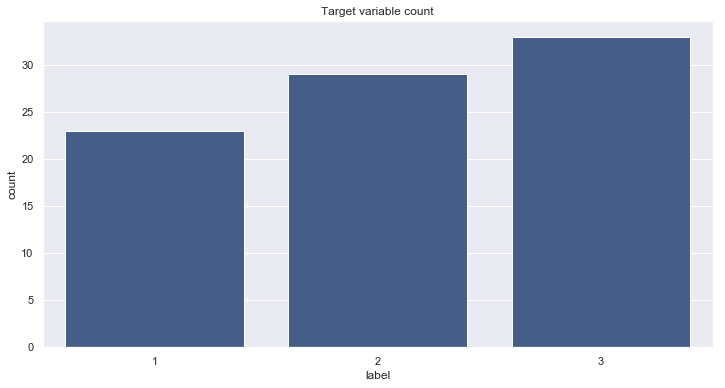

In [21]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x=target, data=data, color=sns.xkcd_rgb["denim blue"])
plt.title('Target variable count')
plt.show()

We are dealing with an imbalanced class problem.

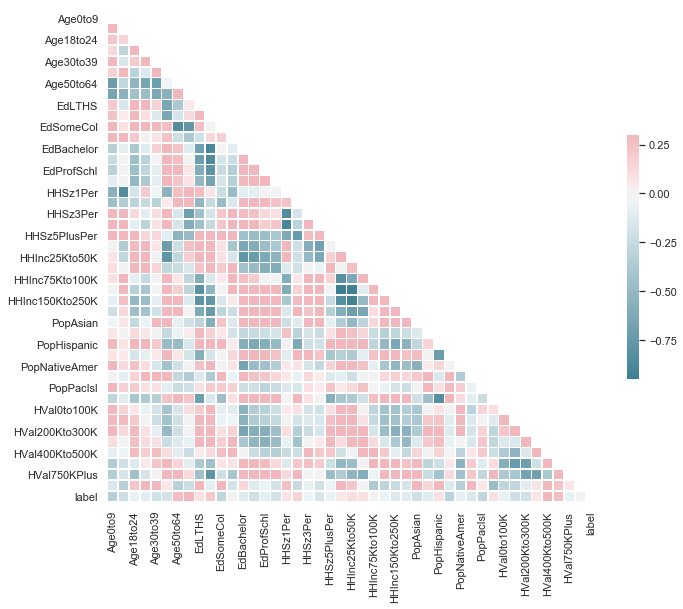

In [22]:
corr = data[data.select_dtypes(include=['float', 'int']).columns.tolist()].corr()

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Some of the variables are correlated with one another, though for most it looks alright.

Now, let's train a model to predict the corresponding label of the segment/cluster.

## Train the model

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix, auc

In [24]:
# Drop the target from the training data
if target in data:
    train = data.drop([target], axis=1)
else:
    train = data.copy()

In [25]:
# Feature names
features = list(train.columns)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(train, data[target], test_size=0.2, random_state=random_seed)

In [27]:
def get_cm(y_test, est_pred):
    # Creates a confusion matrix
    cm = confusion_matrix(y_test, est_pred) 
    # Transform to df for easier plotting
    cm_df = pd.DataFrame(cm,
                         index = ['1','2','3'], 
                         columns = ['1','2','3'])
    plt.figure(figsize=(5.5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('\nAccuracy:{0:.3f}'.format(accuracy_score(y_test, est_pred)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [28]:
def get_feat_imp(feat_imp, X_train):
    feature_importances = pd.DataFrame(feat_imp,
                                       index = X_train.columns,
                                       columns=['importance']).sort_values('importance',ascending=False)
    plt.figure(figsize = (12, 12))
    ax = sns.barplot(x='importance', y='index', data=feature_importances.reset_index(), color=sns.xkcd_rgb["denim blue"])
    plt.show()

In [29]:
def get_eval(X_train, y_test, est_pred, feat_imp):
    print('Accuracy score: {}\n'.format(accuracy_score(y_test, est_pred)))
    print('Misclassified samples: %d' % (y_test != est_pred).sum())
    get_cm(y_test, est_pred)
    print(classification_report(y_test, est_pred, target_names=['1', '2', '3']))
    get_feat_imp(feat_imp, X_train)

In [30]:
def grid_search_score(estimator, param_grid, cv, X_train, y_train, X_test, y_test):
            
    if estimator == 'dt':
        CV_dt = GridSearchCV(
            estimator=DecisionTreeClassifier(),
            param_grid=param_grid,
            cv=cv)
        CV_dt.fit(X_train, y_train)
        dt = DecisionTreeClassifier()
        dt.set_params(**CV_dt.best_params_)
        print('{}\n'.format(dt))
        dt_fit = dt.fit(X_train, y_train)
        dt_pred = dt_fit.predict(X_test)
        get_eval(X_train, y_test, dt_pred, dt.feature_importances_)
    
    elif estimator == 'rf':
        rf = RandomForestClassifier()
        CV_rf = GridSearchCV(
            estimator=rf,
            param_grid=param_grid,
            cv=cv)
        CV_rf.fit(X_train, y_train)
        rf = RandomForestClassifier()
        rf.set_params(**CV_rf.best_params_)
        print('{}\n'.format(rf))
        rf_fit = rf.fit(X_train, y_train)
        rf_pred = rf_fit.predict(X_test)
        get_eval(X_train, y_test, rf_pred, rf.feature_importances_)
        
    elif estimator == 'gb':
        gb = GradientBoostingClassifier()
        CV_gb = GridSearchCV(
            estimator=gb,
            param_grid=param_grid,
            cv=cv)
        CV_gb.fit(X_train, y_train)
        gb = GradientBoostingClassifier()
        gb.set_params(**CV_gb.best_params_)
        print('{}\n'.format(gb))
        gb_fit = gb.fit(X_train, y_train)
        gb_pred = gb_fit.predict(X_test)
        get_eval(X_train, y_test, gb_pred, gb.feature_importances_)

    else:
        print('Sorry, please choose an estimator that is available: dt, rf, gb.')

### Decision Tree

In [31]:
param_grid = {
    'criterion':('gini', 'entropy'),
    'min_samples_split':np.arange(2, 10, 1),
    'max_depth':np.arange(3, 45, 3),
    'class_weight':('balanced', None),
    'presort':(False,True),
    'random_state':[random_seed],
}

cv = 5

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=6, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=3,
            splitter='best')

Accuracy score: 0.7058823529411765

Misclassified samples: 5


/Users/cdai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


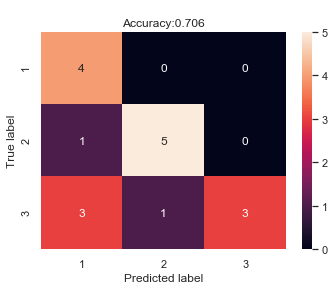

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         4
           2       0.83      0.83      0.83         6
           3       1.00      0.43      0.60         7

   micro avg       0.71      0.71      0.71        17
   macro avg       0.78      0.75      0.70        17
weighted avg       0.82      0.71      0.70        17



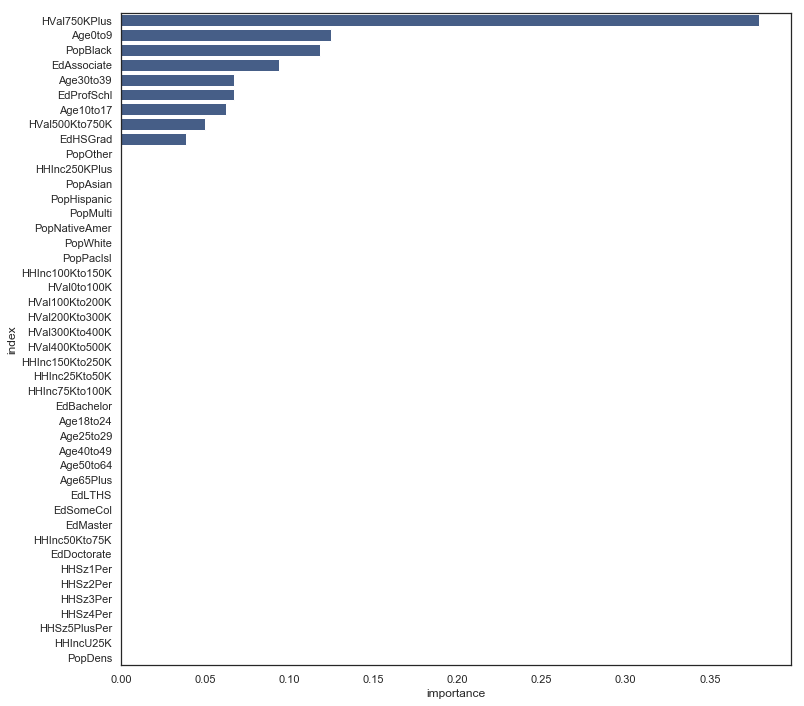

In [32]:
grid_search_score('dt', param_grid, cv, X_train, y_train, X_test, y_test)

### Random Forest

In [33]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state':[random_seed],
}

cv = 5

/Users/cdai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

Accuracy score: 0.8235294117647058

Misclassified samples: 3


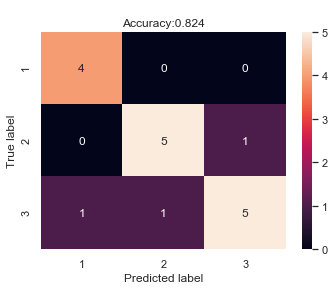

              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       0.83      0.83      0.83         6
           3       0.83      0.71      0.77         7

   micro avg       0.82      0.82      0.82        17
   macro avg       0.82      0.85      0.83        17
weighted avg       0.83      0.82      0.82        17



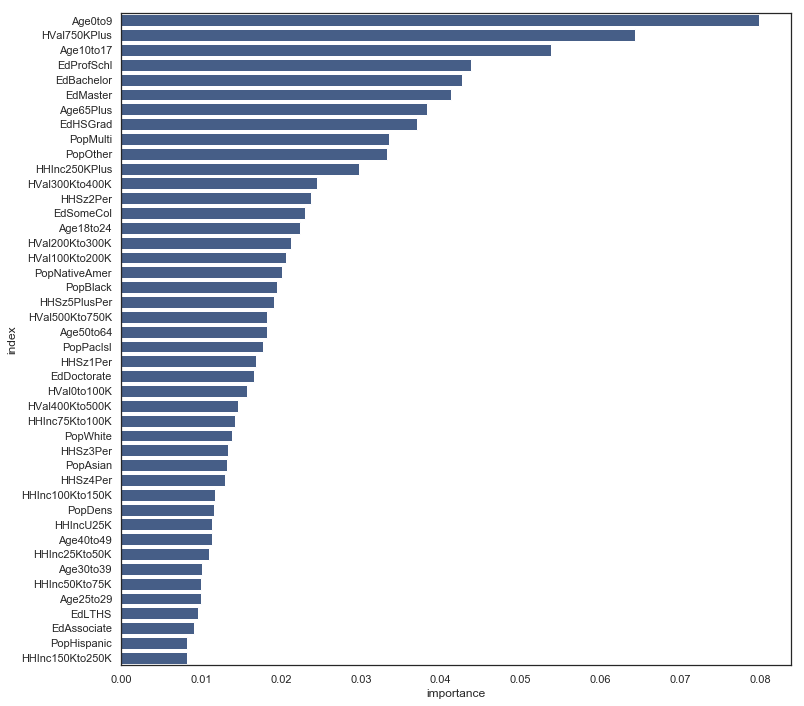

In [34]:
grid_search_score('rf', param_grid, cv, X_train, y_train, X_test, y_test)

### Gradient Boosting

In [35]:
param_grid = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10],
    'random_state':[random_seed],
    }

cv = 5

/Users/cdai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.15, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=0.1, min_samples_split=0.3545454545454546,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=3,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Accuracy score: 0.8235294117647058

Misclassified samples: 3


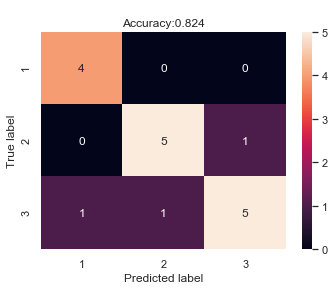

              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       0.83      0.83      0.83         6
           3       0.83      0.71      0.77         7

   micro avg       0.82      0.82      0.82        17
   macro avg       0.82      0.85      0.83        17
weighted avg       0.83      0.82      0.82        17



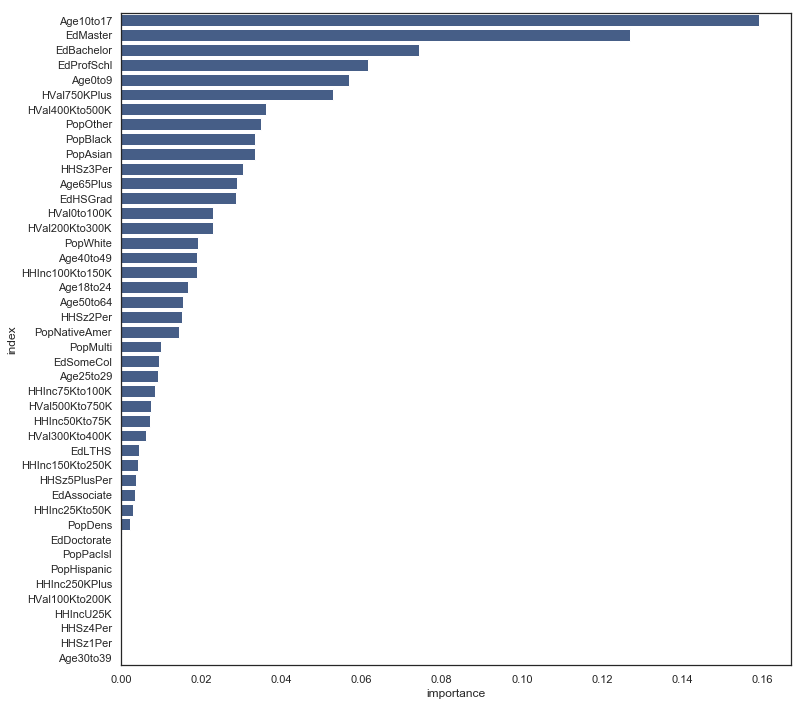

In [36]:
grid_search_score('gb', param_grid, cv, X_train, y_train, X_test, y_test)

### Compare models

We choose Gradient Boosting model.

### Predict for new stores

In [37]:
gb = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.15, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=0.1, min_samples_split=0.3545454545454546,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=3,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
gb_fit = gb.fit(X_train, y_train)

In [38]:
gb_fit.predict(test)

array([3, 2, 3, 2, 2, 1, 2, 1, 2, 2])

In [39]:
def assign_new_stores(test, algo):
    stores_new_assigned = test.copy()
    if algo == 'dt':
        preds = dt_fit.predict(test)
        stores_new_assigned['clusters'] = preds
    elif algo == 'rf':
        preds = rf_fit.predict(test)
        stores_new_assigned['clusters'] = preds
    elif algo == 'gb':
        preds = gb_fit.predict(test)
        stores_new_assigned['clusters'] = preds
    else:
        print('Please select one of the algorithms we used to train the data: dt, rf or gb.')
    
    return stores_new_assigned

In [40]:
stores_new_assigned = assign_new_stores(test, 'gb')
stores_new_assigned.shape

(10, 45)

In [41]:
stores_new_assigned = pd.merge(pd.merge(stores_new, demo, on='Store'), stores_new_assigned,  how='left', left_on=list(test.columns), right_on = list(test.columns))
stores_new_assigned.shape

(10, 51)

In [42]:
stores_new_assigned.to_csv('stores_new_assigned.csv', index=False)

---

# Task 3: Forecasting

Fresh produce has a short life span, and due to increasing costs, the company wants to have an accurate monthly sales forecast.

You’ve been asked to prepare a monthly forecast for produce sales for the full year of 2016 for both existing and new stores. To do so, follow the steps below.

**Note**: Use a 6 month holdout sample for the TS Compare tool (this is because we do not have that much data so using a 12 month holdout would remove too much of the data)

**Step 1**: To forecast produce sales for existing stores you should aggregate produce sales across all stores by month and create a forecast.

**Step 2**: To forecast produce sales for new stores:

* Forecast produce sales (not total sales) for the average store (rather than the aggregate) for each segment.
* Multiply the average store produce sales forecast by the number of new stores in that segment.
* For example, if the forecasted average store produce sales for segment 1 for March is 10,000, and there are 4 new stores in segment 1, the forecast for the new stores in segment 1 would be 40,000.
* Sum the new stores produce sales forecasts for each of the segments to get the forecast for all new stores.

**Step 3**: Sum the forecasts of the existing and new stores together for the total produce sales forecast.

## Task 3 Submission

1. What type of ETS or ARIMA model did you use for each forecast? Use ETS(a,m,n) or ARIMA(ar, i, ma) notation. How did you come to that decision?
2. Please provide a table of your forecasts for existing and new stores. Also, provide visualization of your forecasts that includes historical data, existing stores forecasts, and new stores forecasts.

In [43]:
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,8)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [44]:
from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

import scipy.stats as scs

from sklearn.model_selection import TimeSeriesSplit # you have everything done for you

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

In [45]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# from https://github.com/CamDavidsonPilon/Python-Numerics/blob/master/TimeSeries/MASE.py
def mean_absolute_scaled_error(training_series, testing_series, prediction_series):
    n = training_series.shape[0]
    d = np.abs(np.diff(training_series)).sum()/(n-1)
    errors = np.abs(testing_series - prediction_series)
    return errors.mean()/d

In [46]:
def get_error(test, pred):
    return pd.DataFrame([['MSE', mean_squared_error(test, pred)],
                         ['RMSE', np.sqrt(mean_squared_error(test, pred))],
                         ['MDAE', median_absolute_error(test, pred)],
                         ['MAE', mean_absolute_error(test, pred)],
                         ['MSLE', mean_squared_log_error(test, pred)],
                         ['MAPE', mean_absolute_percentage_error(test, pred)],
                         ['R2', r2_score(test, pred)]],
                        columns=['Metric', 'Value']).T

In [47]:
sales_produce = sales[['Store', 'Day', 'Month', 'Year', 'Produce']]
sales_produce.shape

(116232, 5)

In [48]:
sales_produce.columns = map(str.lower, sales_produce.columns)

In [49]:
sales_produce.year.describe()

count   116232.000
mean      2013.584
std          1.094
min       2012.000
25%       2013.000
50%       2014.000
75%       2015.000
max       2015.000
Name: year, dtype: float64

We have data available from 2012 to 2015.

We need to convert the separate Day, Month, Year columns into a datetime column.

In [50]:
sales_produce['date'] = pd.to_datetime(sales_produce[['year', 'month', 'day']], format='%Y-%m-%d', errors='coerce')

In [51]:
sales_produce = sales_produce[['store', 'produce', 'date']]
sales_produce.shape

(116232, 3)

In [52]:
pd.merge(sales, stores_new, on='Store').shape[0]

0

As mentioned in the beginning, the sales data contains only data on the existing stores.

Now, let's aggregate produce sales across all stores by month for the existing stores.

In [53]:
sales_produce = sales_produce.set_index('date')

In [54]:
monthly_exist = sales_produce.groupby(pd.Grouper(freq='M')).sum()

Now we have the monthly aggregates for produce sales across all stores, ranging from March 2012 until including December 2015.

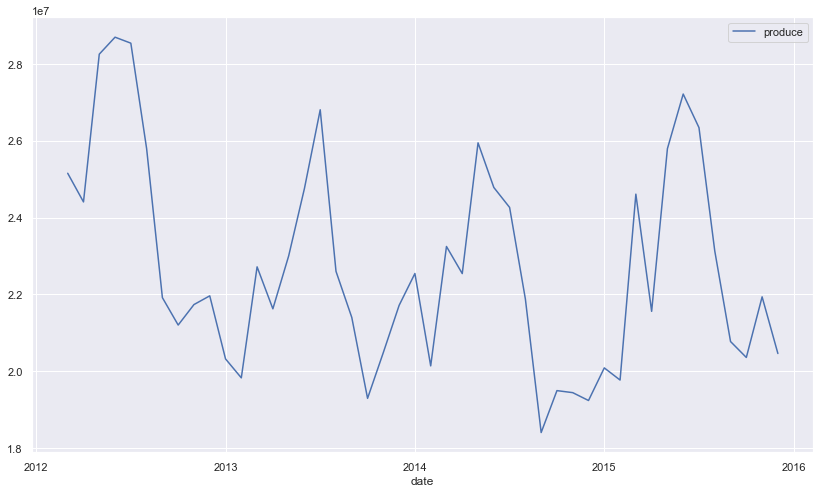

In [55]:
monthly_exist.plot(kind='line')
plt.show()

In [56]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

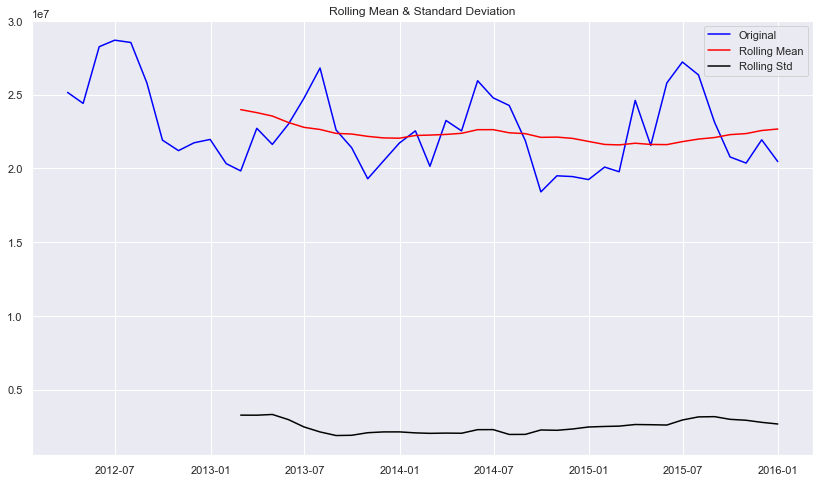

Results of Dickey-Fuller Test:
Test Statistic                -2.850
p-value                        0.051
#Lags Used                     9.000
Number of Observations Used   36.000
Critical Value (1%)           -3.627
Critical Value (5%)           -2.946
Critical Value (10%)          -2.612
dtype: float64


In [57]:
test_stationarity(monthly_exist.iloc[:,0])

Upon first inspection, the mean is not clearly increasing with time. The p-value is slightly larger than 0.05. The test statistic is bigger than the 10% test statistic.

Before we continue, let's first create a holdout sample. We will usea 6 month holdout sample, because we do not have that much data, so using a 12 month holdout would remove too much of the data.

In [58]:
monthly_exist.tail(6)

,produce
date,
2015-07-31,26338477.150
2015-08-31,23130626.600
2015-09-30,20774415.930
2015-10-31,20359980.580
2015-11-30,21936906.810
2015-12-31,20462899.300


In [59]:
train = monthly_exist.loc[:'2015-07-01']
train.index = pd.to_datetime(train.index)
test = monthly_exist.loc['2015-07-01':]
test.index = pd.to_datetime(test.index)
test.shape

(6, 1)

## Forecast for existing stores

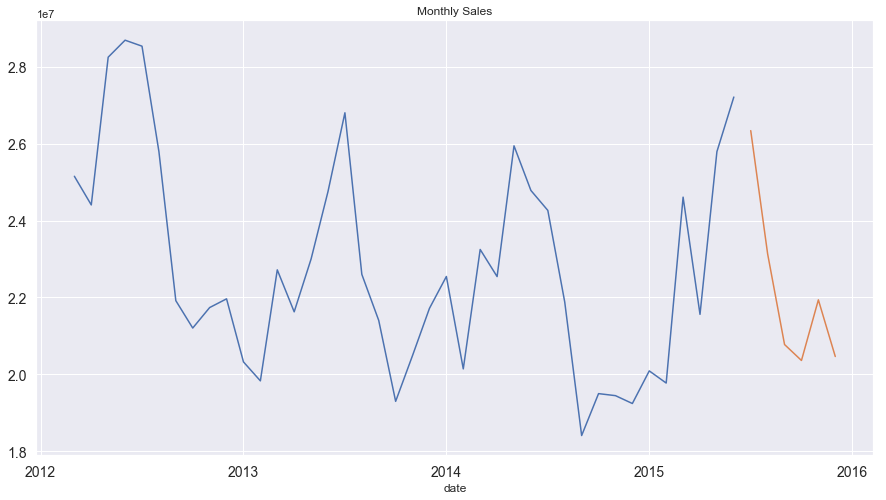

In [60]:
train.produce.plot(figsize=(15,8), title= 'Monthly Sales', fontsize=14)
test.produce.plot(figsize=(15,8), title= 'Monthly Sales', fontsize=14)
plt.show()

Now, let's determine trend, seasonal and error components.

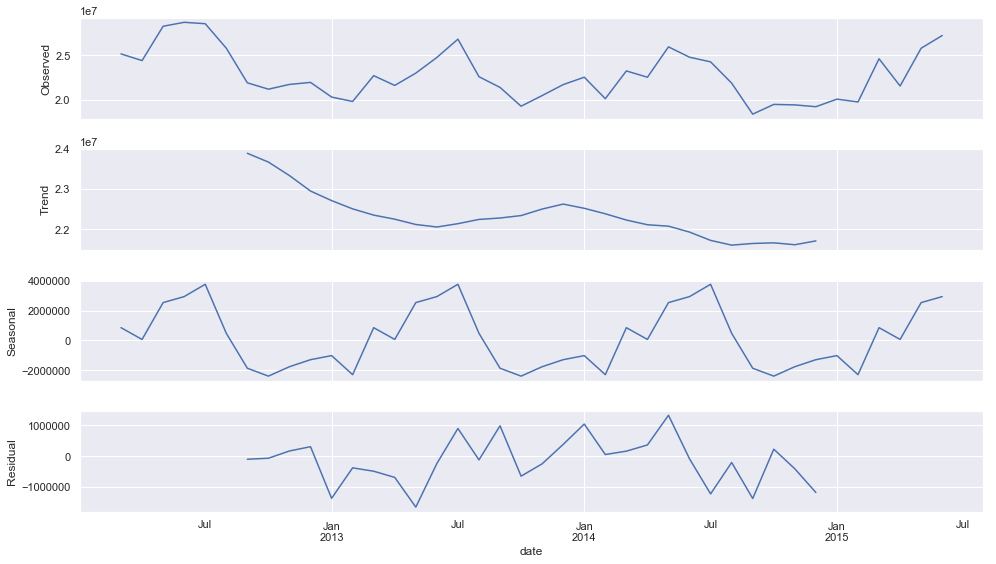

In [61]:
decomposition = seasonal_decompose(train)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = decomposition.plot()
plt.show()

In [62]:
seasonal.loc[seasonal.index.month==7]

,produce
date,
2012-07-31,3763474.800
2013-07-31,3763474.800
2014-07-31,3763474.800


We have the scenario:
* Error: has no trend, but has fluctuations, i.e. multiplicative
* Trend: unclear, thus nothing applied
* Seasonality: remains constant, i.e. additive (see table above, the numbers are the same each year)

**Our model: non-dampened ETS(M,N,A).**

Now that we have determined the model type, we should build it. Holt-Winters has an advantage of **not requiring data to be stationary** :)


In [63]:
model_hwes_nd = ExponentialSmoothing(train.produce,
                             damped=False,
                             trend=None,
                             seasonal='add',
                             seasonal_periods=12).fit()
pred_hwes_nd = model_hwes_nd.predict(start=test.index[0], end=test.index[-1])
fitted_hwes_nd = model_hwes_nd.fittedvalues

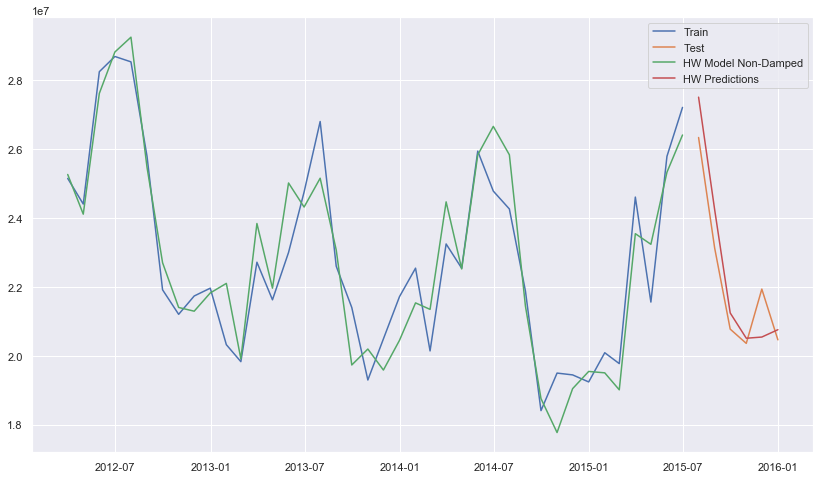

In [64]:
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(fitted_hwes_nd.index, fitted_hwes_nd, label='HW Model Non-Damped')
plt.plot(pred_hwes_nd.index, pred_hwes_nd, label='HW Predictions')
plt.legend(loc='best')
plt.show()

In [65]:
print('Holt-Winters Non-Damped')
get_error(test.produce, pred_hwes_nd)

Holt-Winters Non-Damped


,0,1,2,3,4,5,6
Metric,MSE,RMSE,MDAE,MAE,MSLE,MAPE,R2
Value,813680594046.156,902042.457,791492.891,765136.943,0.002,3.340,0.816


In [66]:
mean_absolute_scaled_error(train.produce, test.produce, pred_hwes_nd)

0.43547480555365414

In [67]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        qq_ax = plt.subplot2grid(layout, (1, 0))
        pp_ax = plt.subplot2grid(layout, (1, 1))
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        
        plt.tight_layout()
        plt.show()
        
    lag_acf = acf(y, nlags=24)
    lag_pacf = pacf(y, nlags=24, method='ols')
    
    #Plot ACF: 
    plt.subplot(121) 
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function')

    #Plot PACF:
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()

    plt.show()

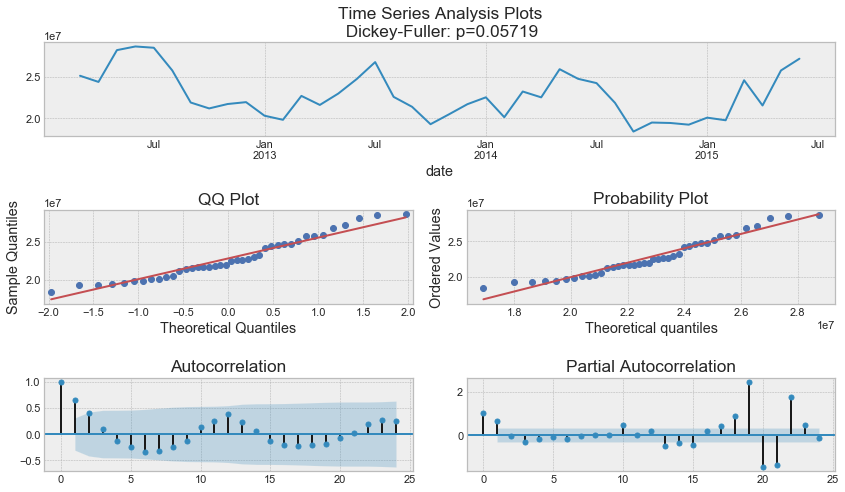

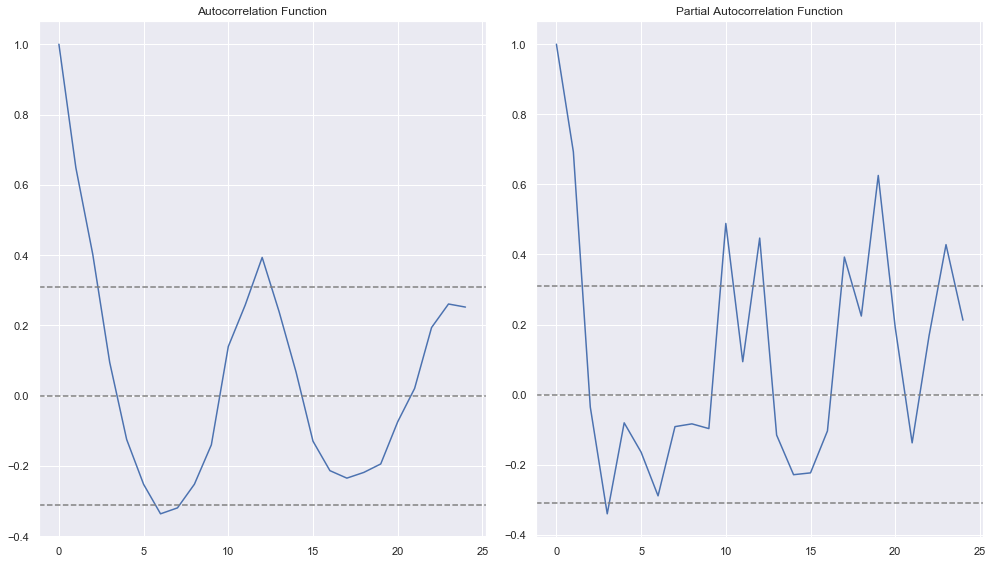

In [68]:
tsplot(train.produce, lags=24)

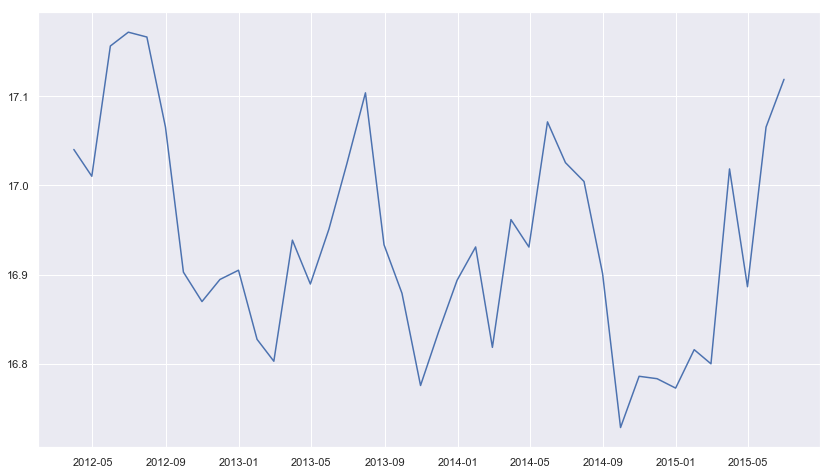

In [69]:
train_log = np.log(train)
plt.plot(train_log)
plt.show()

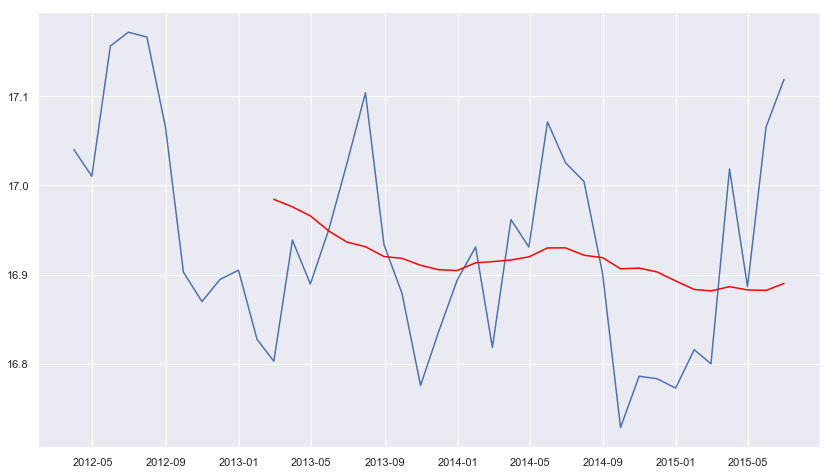

In [70]:
moving_avg = train_log.rolling(12).mean()
plt.plot(train_log)
plt.plot(moving_avg, color='red')
plt.show()

In [71]:
train_log_moving_avg_diff = train_log - moving_avg
train_log_moving_avg_diff.head(12)

,produce
date,
2012-03-31,nan
2012-04-30,nan
2012-05-31,nan
2012-06-30,nan
2012-07-31,nan
2012-08-31,nan
2012-09-30,nan
2012-10-31,nan
2012-11-30,nan


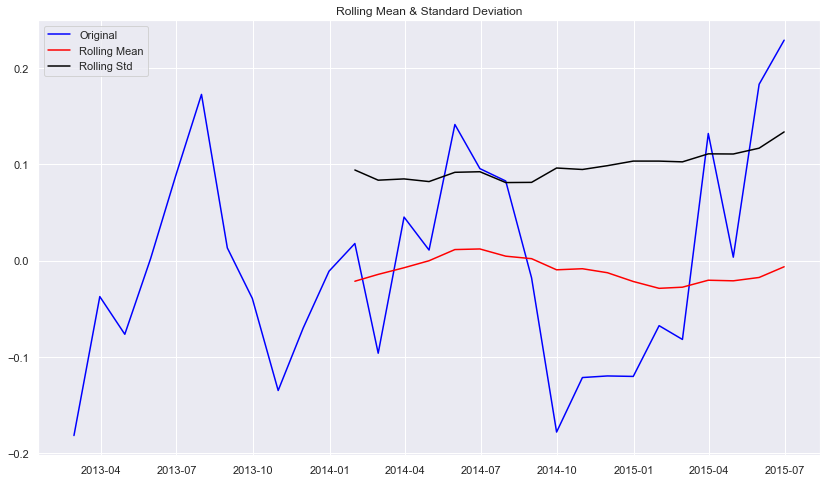

Results of Dickey-Fuller Test:
Test Statistic                -3.569
p-value                        0.006
#Lags Used                     8.000
Number of Observations Used   20.000
Critical Value (1%)           -3.809
Critical Value (5%)           -3.022
Critical Value (10%)          -2.651
dtype: float64


In [72]:
train_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(train_log_moving_avg_diff.iloc[:,0])

* The test statistic is smaller than the 5% critical value but bigger than the 1% critical value.
* The p-value is smaller than 0.05

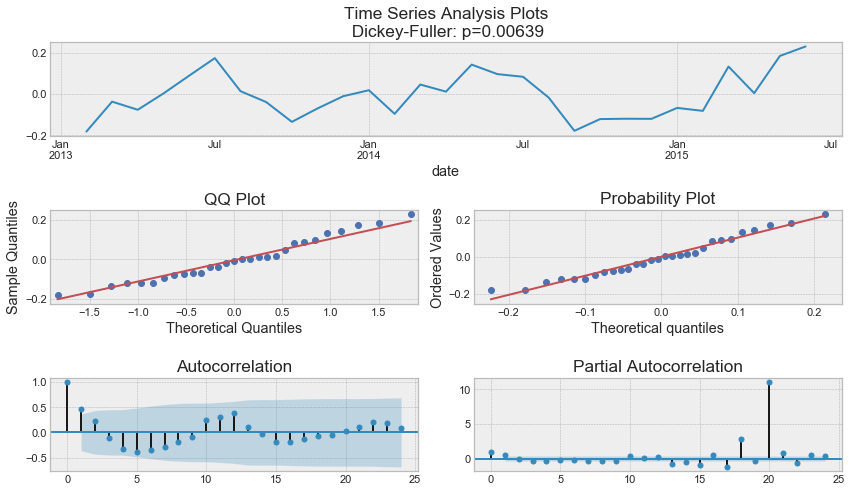

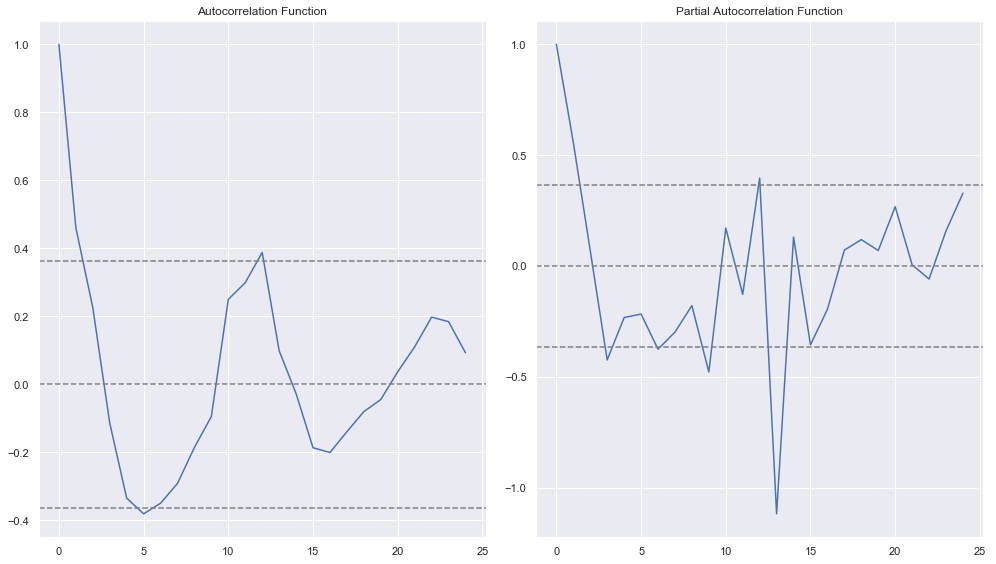

In [73]:
tsplot(train_log_moving_avg_diff.produce, lags=24)

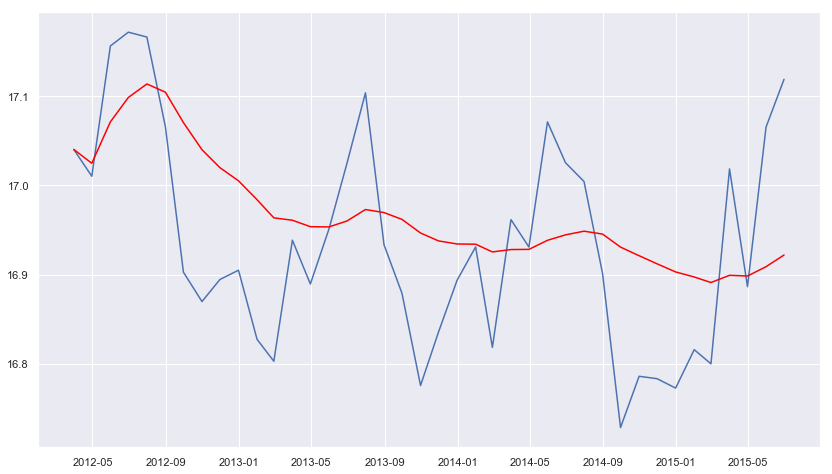

In [74]:
expwighted_avg = train_log.ewm(halflife=12).mean()
plt.plot(train_log)
plt.plot(expwighted_avg, color='red')
plt.show()

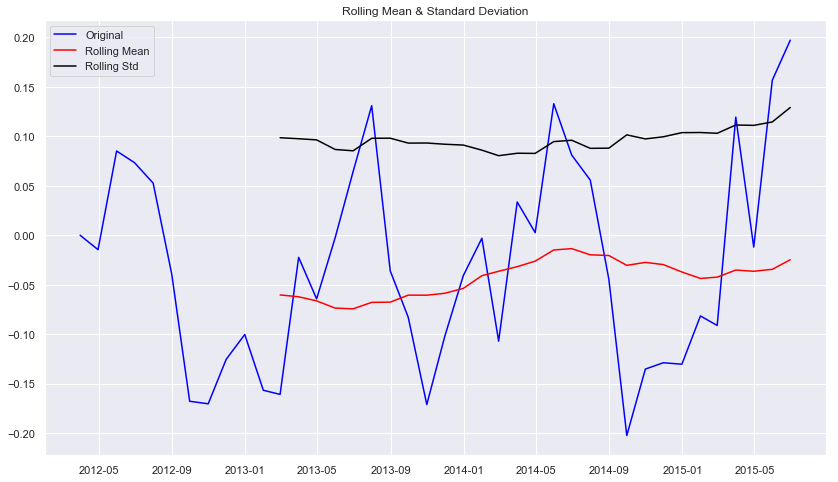

Results of Dickey-Fuller Test:
Test Statistic                -1.432
p-value                        0.567
#Lags Used                     9.000
Number of Observations Used   30.000
Critical Value (1%)           -3.670
Critical Value (5%)           -2.964
Critical Value (10%)          -2.621
dtype: float64


In [75]:
train_log_ewma_diff = train_log - expwighted_avg
test_stationarity(train_log_ewma_diff.iloc[:,0])

No improvement here...

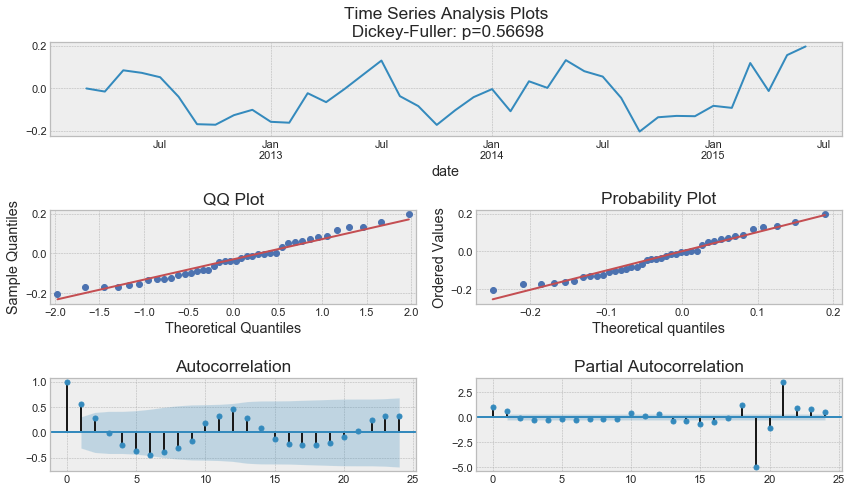

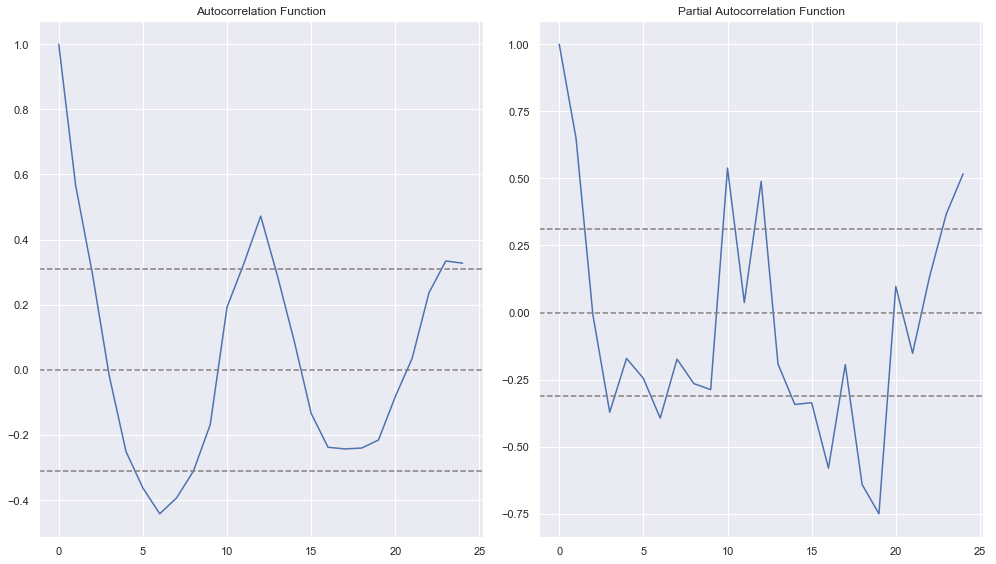

In [76]:
tsplot(train_log_ewma_diff.produce, lags=24)

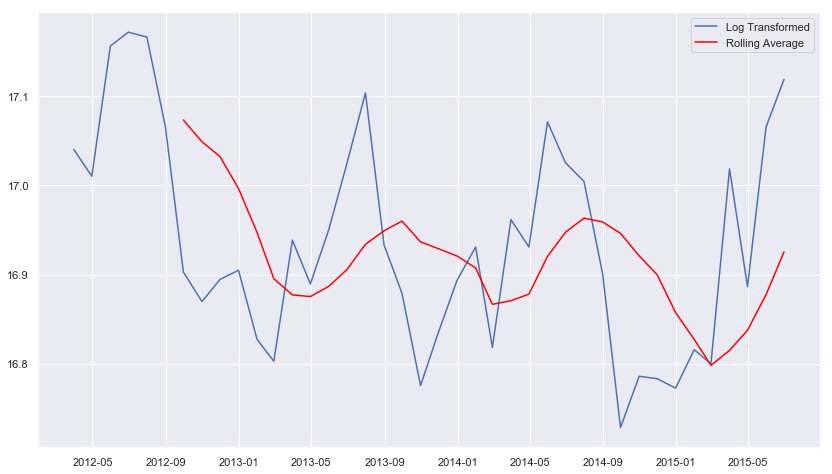

In [77]:
window = 7
rolling_average = train_log.rolling(window = window, center= False).mean()
train_log_rolling = rolling_average.dropna()
plt.plot(train_log, label = 'Log Transformed')
plt.plot(train_log_rolling, color = 'red', label = 'Rolling Average')
plt.legend(loc = 'best')
plt.show()

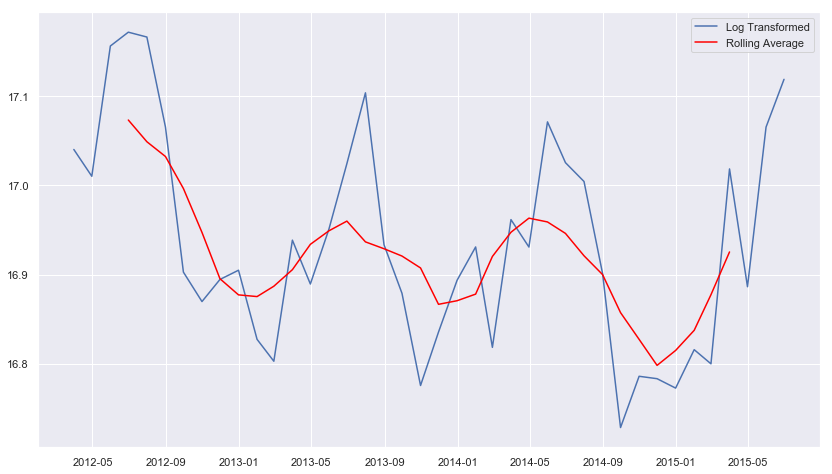

In [78]:
window = 7
shift_by_months = -3
rolling_average = train_log.rolling(window = window, center= False).mean()
train_log_rolling_temp = rolling_average.shift(shift_by_months).dropna()
plt.plot(train_log, label = 'Log Transformed')
plt.plot(train_log_rolling_temp, color = 'red', label = 'Rolling Average')
plt.legend(loc = 'best')
plt.show()

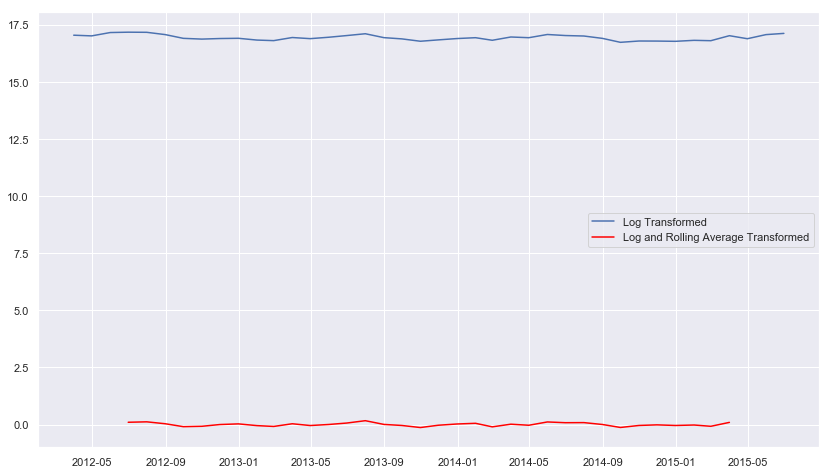

In [79]:
train_log_rolling = (train_log - train_log_rolling_temp).dropna()
plt.plot(train_log, label = 'Log Transformed')
plt.plot(train_log_rolling, color = 'red', label = 'Log and Rolling Average Transformed')
plt.legend(loc = 'best')
plt.show()

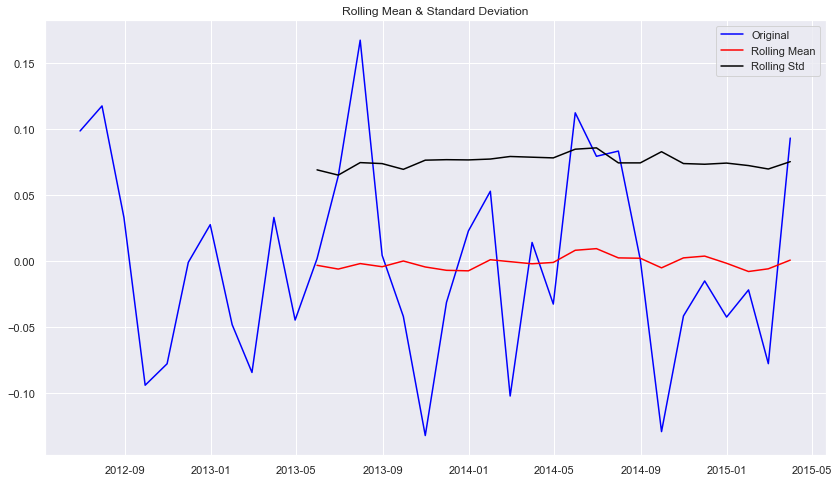

Results of Dickey-Fuller Test:
Test Statistic                -3.944
p-value                        0.002
#Lags Used                    10.000
Number of Observations Used   23.000
Critical Value (1%)           -3.753
Critical Value (5%)           -2.998
Critical Value (10%)          -2.639
dtype: float64


In [80]:
test_stationarity(train_log_rolling.produce)

Yes!

* Test statistic is lower than the critical values
* p-value is lower than 0.05

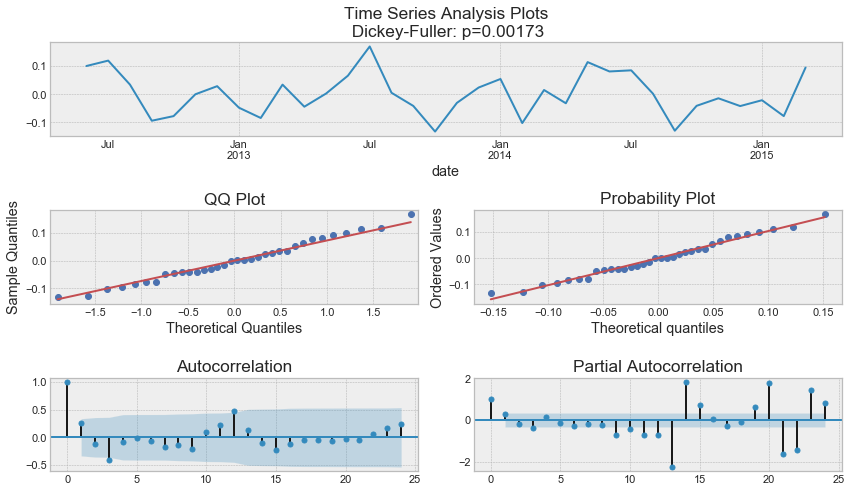

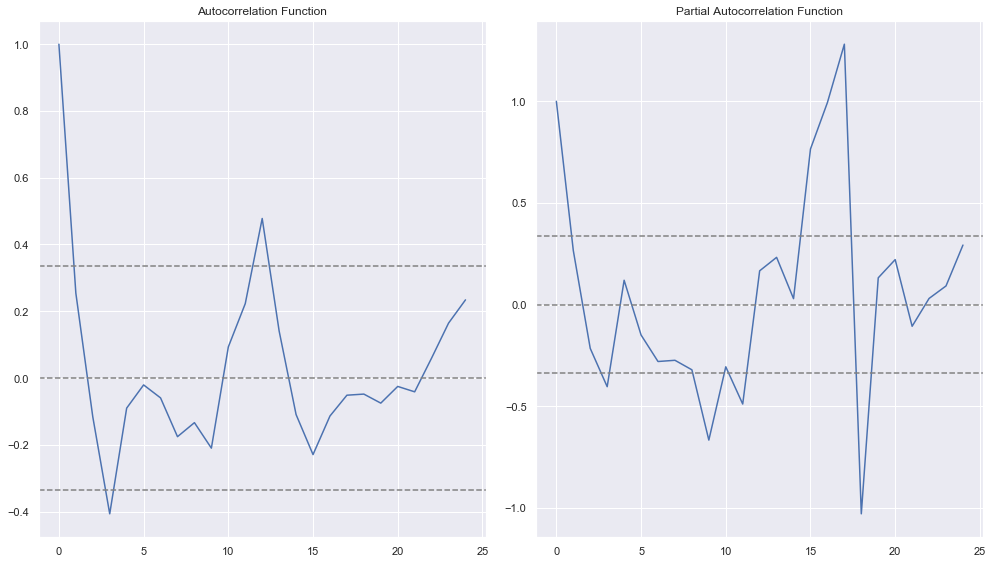

In [81]:
tsplot(train_log_rolling.produce, lags=24)

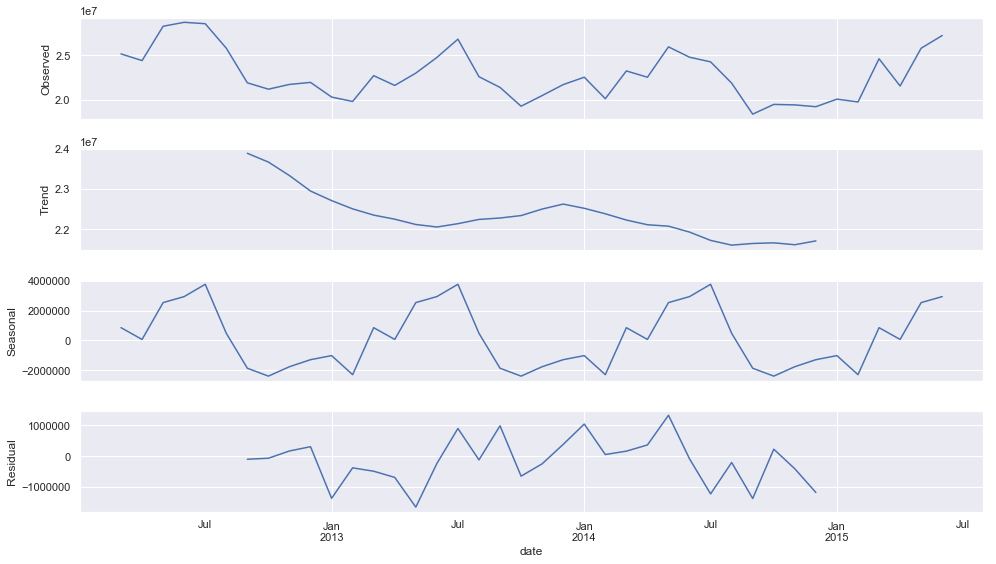

In [82]:
decomposition = seasonal_decompose(train)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = decomposition.plot()
plt.show()

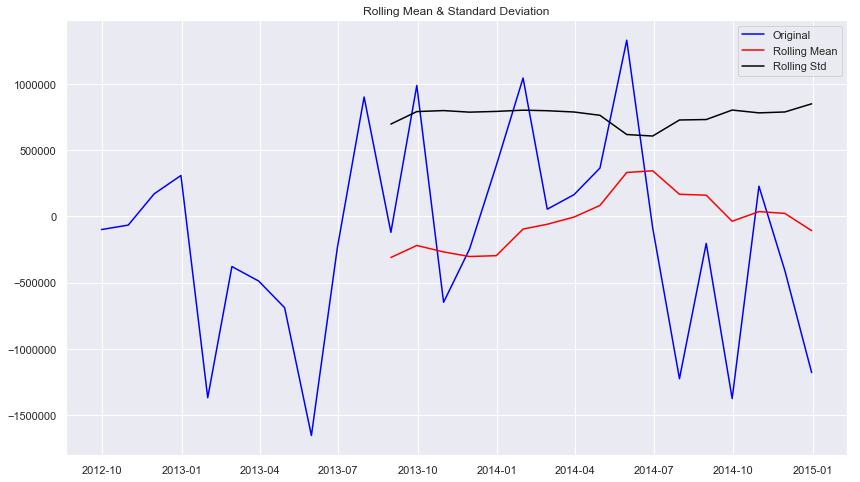

Results of Dickey-Fuller Test:
Test Statistic                -4.118
p-value                        0.001
#Lags Used                     0.000
Number of Observations Used   27.000
Critical Value (1%)           -3.700
Critical Value (5%)           -2.976
Critical Value (10%)          -2.628
dtype: float64


In [83]:
train_decompose = residual
train_decompose.dropna(inplace=True)
test_stationarity(train_decompose.iloc[:,0])

Yesss again!

* Test statistic is significantly lower than the 1% critical value.
* P-value is smaller than 0.05

This TS is very close to stationary.

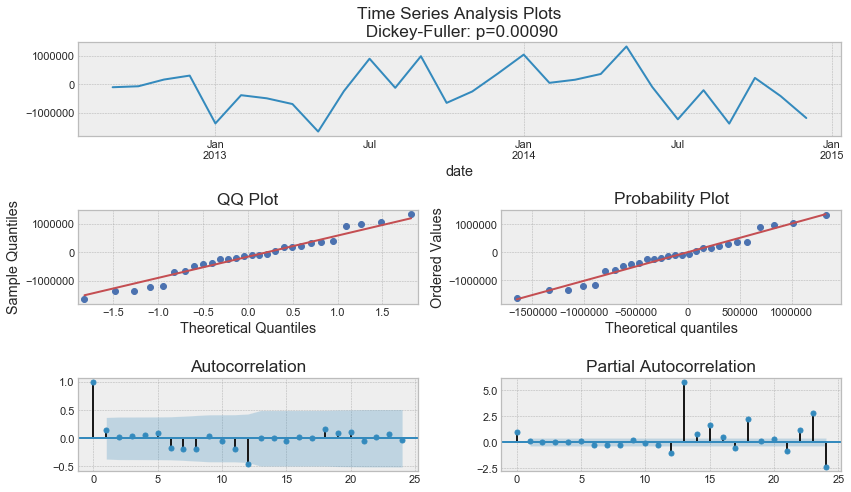

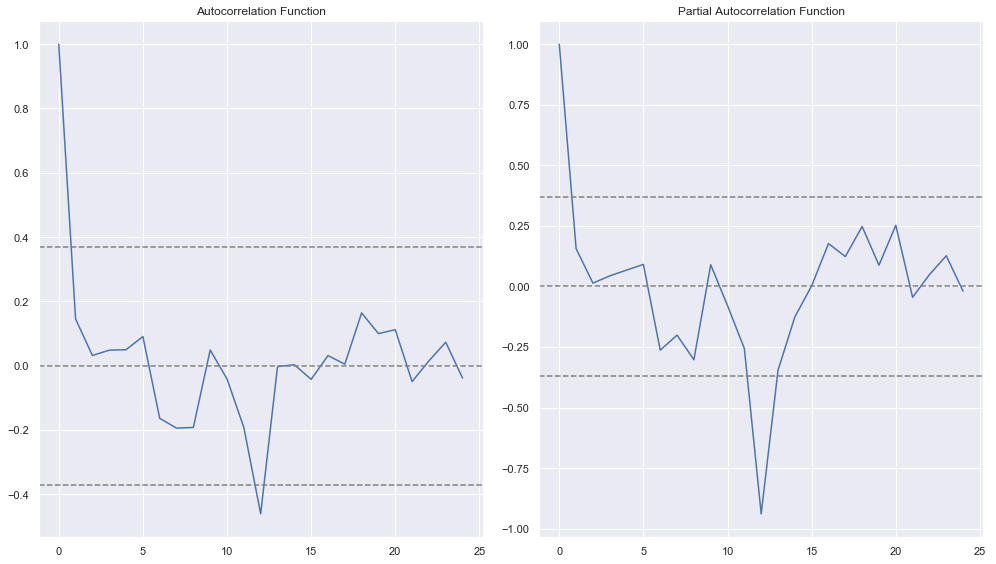

In [84]:
tsplot(train_decompose.produce, lags=24)

Overview of our prepared data:

* `train` - original training data
* `train_log_rolling` - training data made stationary using differencing
* `train_decompose` - training data made stationary using decomposition

Let's use our stationary TS from the decomposition, since it showed the least autocorrelation.

In [85]:
ts = train_decompose

In [86]:
# setting initial values and some bounds for them
ps = range(0, 15)
ds = [0, 1]
qs = range(0, 15)
Ps = range(0, 2)
Ds = [0, 1]
Qs = range(0, 2)
s = 12 # season length is still 12

# creating list with all the possible combinations of parameters
parameters = product(ps, ds, qs, Ps, Ds, Qs)
parameters_list = list(parameters)
len(parameters_list)

3600

In [87]:
def optimizeSARIMA(parameters_list, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(train.produce, order=(param[0], param[1], param[2]), 
                                            seasonal_order=(param[3], param[4], param[5], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [88]:
import warnings
warnings.filterwarnings("ignore")

In [89]:
%%time
result_table = optimizeSARIMA(parameters_list, s)


CPU times: user 2min 32s, sys: 779 ms, total: 2min 33s
Wall time: 1min 57s


In [90]:
result_table.head()

,parameters,aic
0,"(2, 1, 3, 0, 1, 0)",860.345
1,"(1, 1, 0, 0, 1, 0)",861.043
2,"(1, 1, 0, 1, 1, 0)",861.185
3,"(0, 1, 1, 1, 1, 0)",861.381
4,"(0, 1, 1, 0, 1, 0)",861.505


In [91]:
# set the parameters that give the lowest AIC
p, d, q, P, D, Q = result_table.parameters[0]

best_mod=sm.tsa.statespace.SARIMAX(train.produce, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s))

best_res = best_mod.fit(disp=-1)
best_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            produce   No. Observations:                   40
Model:             SARIMAX(2, 1, 3)x(0, 1, 0, 12)   Log Likelihood                -424.173
Date:                            Thu, 21 Mar 2019   AIC                            860.345
Time:                                    15:45:20   BIC                            868.120
Sample:                                03-31-2012   HQIC                           862.657
                                     - 06-30-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5741      0.136     -4.234      0.000      -0.840      -0.308
ar.L2         -0.8903      0.125     -7.122      0.000      -1.135      -0.645
ma.L1          0.5415      0.307      1.765      0.078      -0.060       1.143
ma.L2          0.9509      0.475      2.000      0.045       0.019       1.883
ma.L3         -0.0685      0.179     -0.382      0.702      -0.420       0.283
sigma2      3.003e+12   8.81e-14   3.41e+25      0.000       3e+12       3e+12
===================================================================================
Ljung-Box (Q):                       32.85   Jarque-Bera (JB):                 1.32
Prob(Q):                              0.17   Prob(JB):                         0.52
Heteroskedasticity (H):               1.30   Skew:                            -0.21
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.05e+42. Standard errors may be unstable.
"""

Let's inspect the residuals of the model.

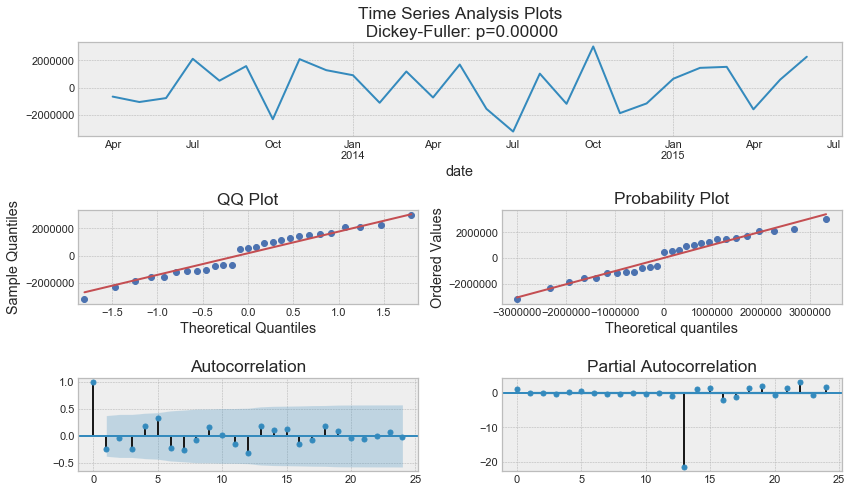

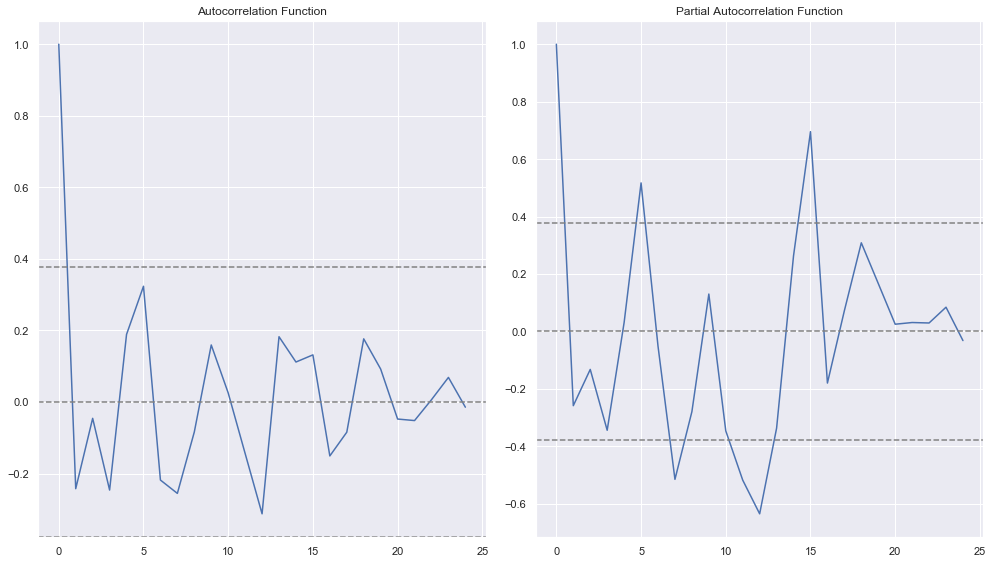

In [92]:
tsplot(best_res.resid[12+1:], lags=24)

In [93]:
def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data.actual, label="actual")
    plt.legend()
    plt.grid(True)
    plt.show()

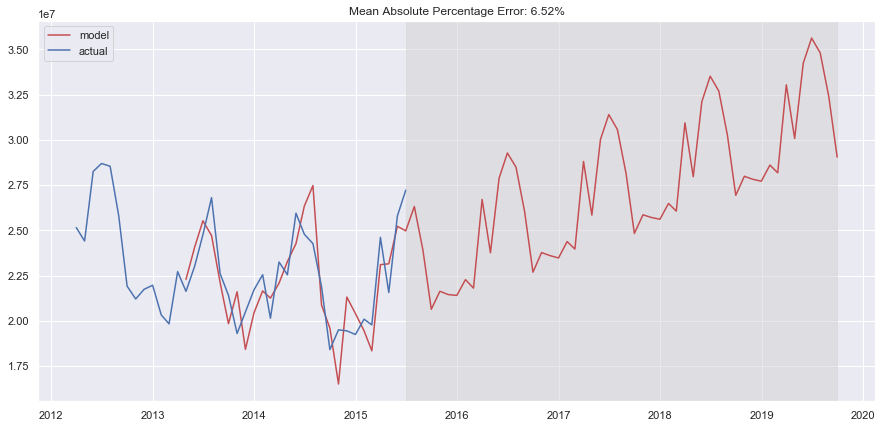

In [94]:
plotSARIMA(train, best_res, 50)

We have a MAPE of 6.52%! Not too bad.

In [95]:
pred_arima = best_res.predict(start=test.index[0], end=test.index[-1])

In [96]:
get_error(test.produce, pred_arima)

,0,1,2,3,4,5,6
Metric,MSE,RMSE,MDAE,MAE,MSLE,MAPE,R2
Value,557404368485.785,746595.184,629454.341,605963.132,0.001,2.861,0.874


In [97]:
mean_absolute_scaled_error(train.produce, test.produce, pred_arima)

0.3448816314420095

Now, let's compare ETS with ARIMA and decide which model was better!

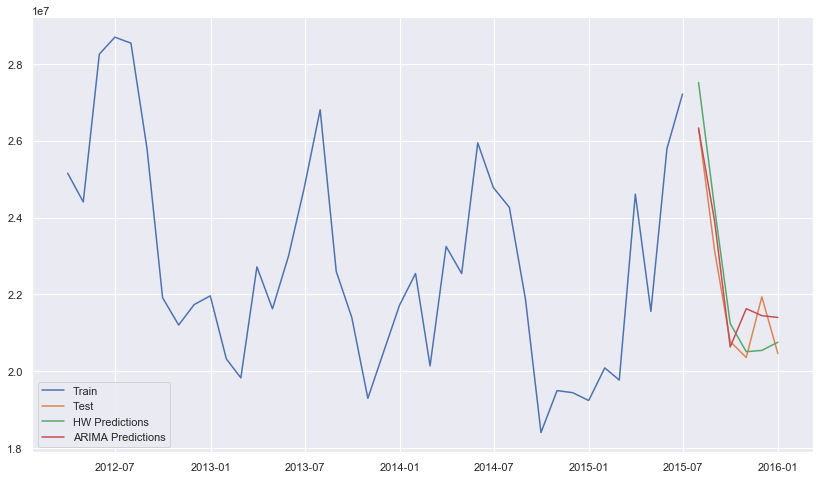

In [98]:
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred_hwes_nd.index, pred_hwes_nd, label='HW Predictions')
plt.plot(pred_arima.index, pred_arima, label='ARIMA Predictions')
plt.legend(loc='best')
plt.show()

In [99]:
get_error(test.produce, pred_hwes_nd)

,0,1,2,3,4,5,6
Metric,MSE,RMSE,MDAE,MAE,MSLE,MAPE,R2
Value,813680594046.156,902042.457,791492.891,765136.943,0.002,3.340,0.816


In [100]:
mean_absolute_scaled_error(train.produce, test.produce, pred_hwes_nd)

0.43547480555365414

In [101]:
get_error(test.produce, pred_arima)

,0,1,2,3,4,5,6
Metric,MSE,RMSE,MDAE,MAE,MSLE,MAPE,R2
Value,557404368485.785,746595.184,629454.341,605963.132,0.001,2.861,0.874


In [102]:
mean_absolute_scaled_error(train.produce, test.produce, pred_arima)

0.3448816314420095

In [103]:
pd.DataFrame(get_error(test.produce, pred_arima).iloc[1,:].sub(get_error(test.produce, pred_hwes_nd).iloc[1,:])).T

,0,1,2,3,4,5,6
Value,-256276225560.371,-155447.273,-162038.550,-159173.811,-0.000,-0.480,0.058


We managed to get a MASE of **0.4269** for ETS(M,N,A) while we got a MASE of **0.3449** for our ARIMA model. ETS has an RSME of **918,863.901** while ARIMA has an RSME of **746,595.184**.

**Our winner is our SARIMAX(2, 1, 3)x(0, 1, 0, 12) model.**

Now it's time to forecast!

In [104]:
import calendar

In [105]:
def add_months(orig_date, n):
    # advance year and month by one month
    new_year = orig_date.year
    new_month = orig_date.month + n
    # note: in datetime.date, months go from 1 to 12
    if new_month > 12:
        new_year += 1
        new_month -= 12

    last_day_of_month = calendar.monthrange(new_year, new_month)[1]
    new_day = min(orig_date.day, last_day_of_month)

    return orig_date.replace(year=new_year, month=new_month, day=new_day)

In [106]:
forecast_beg = add_months(test.index[0], 12)
forecast_end = add_months(test.index[-1], 12)

In [107]:
fcast_arima = best_res.predict(start=train.index[0], end=forecast_end)
fcast_hwes_nd = model_hwes_nd.predict(start=train.index[0], end=forecast_end)

In [108]:
# confidence intervals
ci_arima_95 = best_res.get_forecast(18).conf_int(alpha=0.05).iloc[6:] # 95% CI
ci_arima_80 = best_res.get_forecast(18).conf_int(alpha=0.20).iloc[6:] # 80% CI

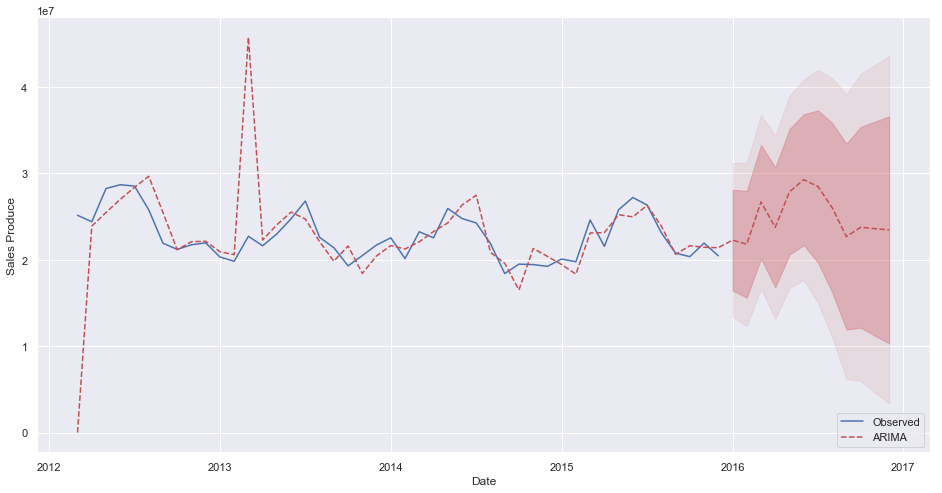

In [109]:
# Graph
fig, ax = plt.subplots(figsize=(16,8))

# Plot data points
comb = train.append(test)
comb.produce.plot(ax=ax, style='-', label='Observed')

# Plot predictions
fcast_arima.plot(ax=ax, style='r--', label='ARIMA')
ax.fill_between(ci_arima_95.index, ci_arima_95.iloc[:,0], ci_arima_95.iloc[:,1], color='r', alpha=0.1)
ax.fill_between(ci_arima_80.index, ci_arima_80.iloc[:,0], ci_arima_80.iloc[:,1], color='r', alpha=0.3)

legend = ax.legend(loc='lower right')
plt.xlabel('Date') , plt.ylabel('Sales Produce')
plt.show()

In [110]:
fcast_exist = fcast_arima.iloc[-12:]
fcast_exist

2016-01-31   22273762.788
2016-02-29   21802714.431
2016-03-31   26705738.513
2016-04-30   23756494.423
2016-05-31   27872142.283
2016-06-30   29271002.135
2016-07-31   28485295.199
2016-08-31   26027151.578
2016-09-30   22684350.178
2016-10-31   23766853.724
2016-11-30   23602838.997
2016-12-31   23469261.084
Freq: M, dtype: float64

Now we need to forecast for the new stores. We do this by forecasting for the average store (rather than the aggregate) for each segment.

## Forecast new stores

In [111]:
stores_exist_assigned = sales_data[['Store', 'Cluster']]
stores_exist_assigned.columns = ['store', 'clusters']
stores_exist_assigned.shape

(85, 2)

In [112]:
stores_new_assigned = stores_new_assigned[['Store', 'clusters']]
stores_new_assigned.columns = ['store', 'clusters']
stores_new_assigned.shape

(10, 2)

In [113]:
sales_produce.head().reset_index()

,date,store,produce
0,2012-03-01,S0001,4542.280
1,2012-03-02,S0001,9503.450
2,2012-03-03,S0001,12793.920
3,2012-03-04,S0001,16635.770
4,2012-03-05,S0001,8358.960


In [114]:
sales_seg = sales_produce.reset_index().merge(stores_exist_assigned, left_on='store', right_on='store')
sales_seg = sales_seg.drop(['store'], axis=1)

In [115]:
monthly_new_1 = sales_seg[sales_seg['clusters'] == 1].set_index('date').groupby(pd.Grouper(freq='M')).sum().iloc[:,:1]
monthly_new_2 = sales_seg[sales_seg['clusters'] == 2].set_index('date').groupby(pd.Grouper(freq='M')).sum().iloc[:,:1]
monthly_new_3 = sales_seg[sales_seg['clusters'] == 3].set_index('date').groupby(pd.Grouper(freq='M')).sum().iloc[:,:1]

### Segment 1

In [116]:
train = monthly_new_1.loc[:'2015-07-01']
train.index = pd.to_datetime(train.index)
test = monthly_new_1.loc['2015-07-01':]
test.index = pd.to_datetime(test.index)
test.shape

(6, 1)

In [117]:
%%time
result_table = optimizeSARIMA(parameters_list, s)


CPU times: user 2min 37s, sys: 795 ms, total: 2min 37s
Wall time: 2min 2s


In [118]:
# set the parameters that give the lowest AIC
p, d, q, P, D, Q = result_table.parameters[0]

best_mod=sm.tsa.statespace.SARIMAX(train.produce, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s))

best_res = best_mod.fit(disp=-1)
best_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            produce   No. Observations:                   40
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -395.992
Date:                            Thu, 21 Mar 2019   AIC                            795.984
Time:                                    15:47:25   BIC                            798.576
Sample:                                03-31-2012   HQIC                           796.755
                                     - 06-30-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0351      0.117     -0.301      0.764      -0.264       0.194
sigma2      3.072e+11   2.41e-14   1.27e+25      0.000    3.07e+11    3.07e+11
===================================================================================
Ljung-Box (Q):                       36.10   Jarque-Bera (JB):                 1.89
Prob(Q):                              0.09   Prob(JB):                         0.39
Heteroskedasticity (H):               1.56   Skew:                            -0.10
Prob(H) (two-sided):                  0.52   Kurtosis:                         1.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.65e+42. Standard errors may be unstable.
"""

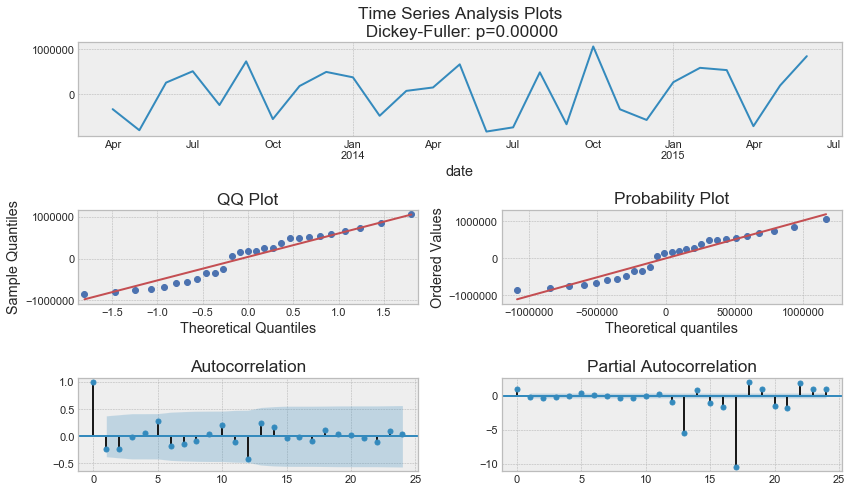

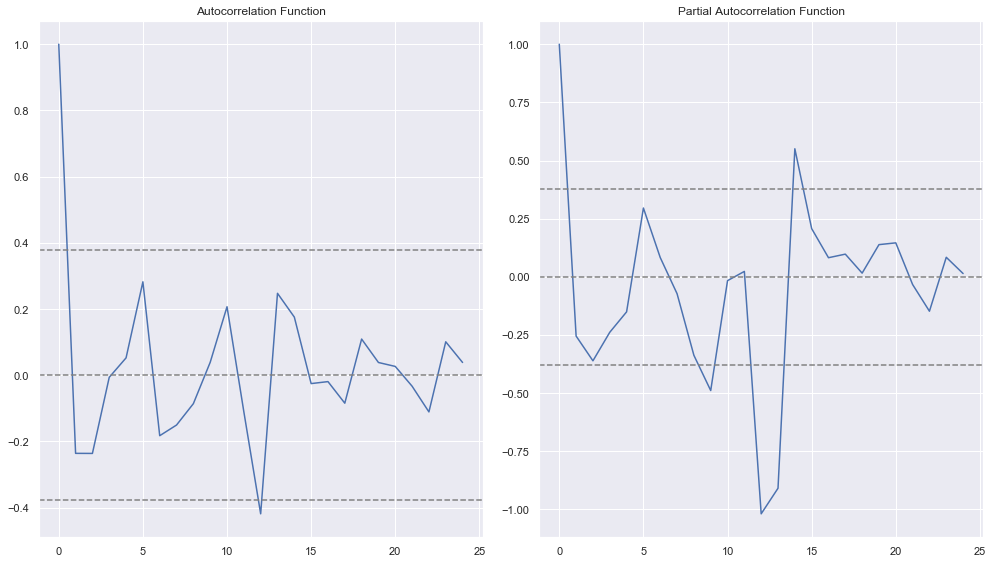

In [119]:
tsplot(best_res.resid[12+1:], lags=24)

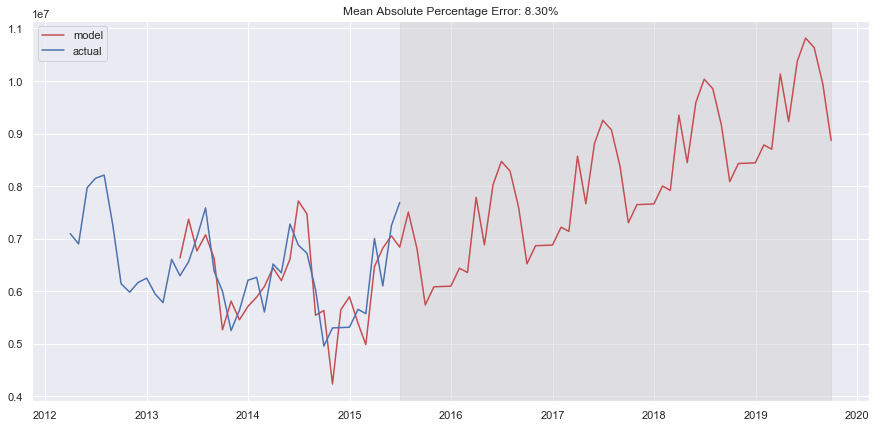

In [120]:
plotSARIMA(train, best_res, 50)

In [121]:
pred_seg_1 = fcast_arima.iloc[-12:]
pred_seg_1

2016-01-31   22273762.788
2016-02-29   21802714.431
2016-03-31   26705738.513
2016-04-30   23756494.423
2016-05-31   27872142.283
2016-06-30   29271002.135
2016-07-31   28485295.199
2016-08-31   26027151.578
2016-09-30   22684350.178
2016-10-31   23766853.724
2016-11-30   23602838.997
2016-12-31   23469261.084
Freq: M, dtype: float64

### Segment 2

In [122]:
train = monthly_new_2.loc[:'2015-07-01']
train.index = pd.to_datetime(train.index)
test = monthly_new_2.loc['2015-07-01':]
test.index = pd.to_datetime(test.index)
test.shape

(6, 1)

In [123]:
%%time
result_table = optimizeSARIMA(parameters_list, s)


CPU times: user 2min 25s, sys: 778 ms, total: 2min 26s
Wall time: 1min 51s


In [124]:
# set the parameters that give the lowest AIC
p, d, q, P, D, Q = result_table.parameters[0]

best_mod=sm.tsa.statespace.SARIMAX(train.produce, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s))

best_res = best_mod.fit(disp=-1)
best_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            produce   No. Observations:                   40
Model:             SARIMAX(2, 1, 3)x(1, 1, 0, 12)   Log Likelihood                -392.820
Date:                            Thu, 21 Mar 2019   AIC                            799.639
Time:                                    15:49:18   BIC                            808.710
Sample:                                03-31-2012   HQIC                           802.337
                                     - 06-30-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5477      0.153     -3.573      0.000      -0.848      -0.247
ar.L2         -0.8670      0.145     -5.965      0.000      -1.152      -0.582
ma.L1          0.5215      0.338      1.544      0.123      -0.140       1.183
ma.L2          0.9479      0.360      2.636      0.008       0.243       1.653
ma.L3         -0.0669      0.258     -0.260      0.795      -0.572       0.438
ar.S.L12      -0.1096      0.123     -0.893      0.372      -0.350       0.131
sigma2       3.53e+11   1.05e-13   3.37e+24      0.000    3.53e+11    3.53e+11
===================================================================================
Ljung-Box (Q):                       29.69   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.28   Prob(JB):                         0.56
Heteroskedasticity (H):               1.33   Skew:                            -0.11
Prob(H) (two-sided):                  0.68   Kurtosis:                         2.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.79e+41. Standard errors may be unstable.
"""

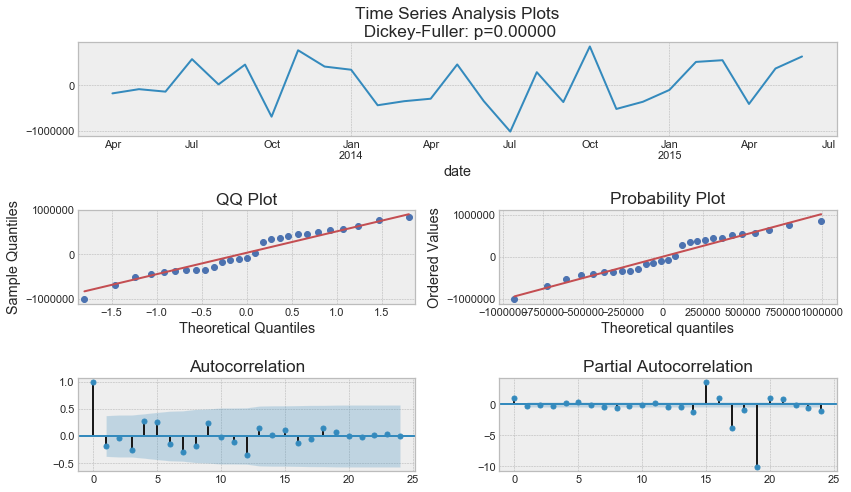

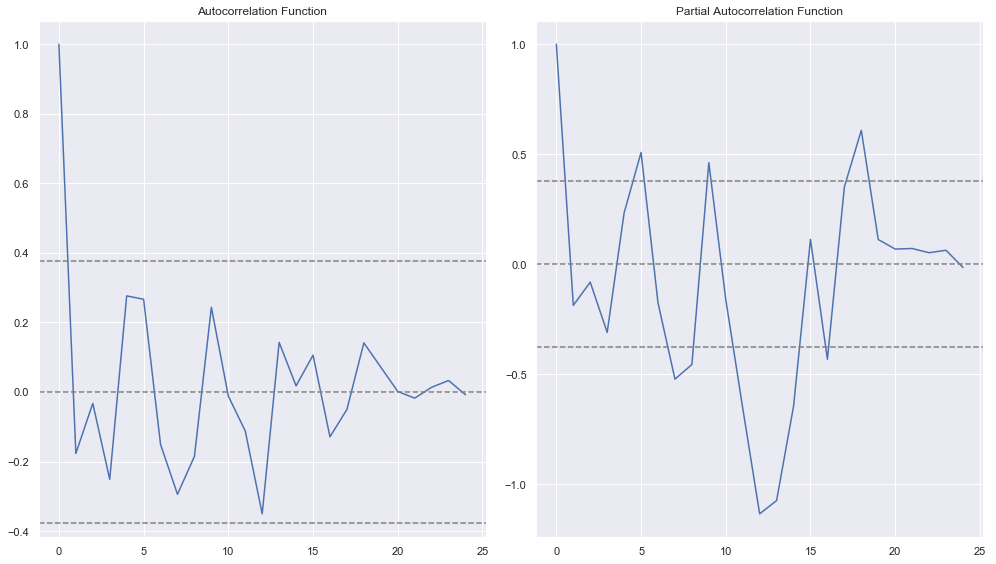

In [125]:
tsplot(best_res.resid[12+1:], lags=24)

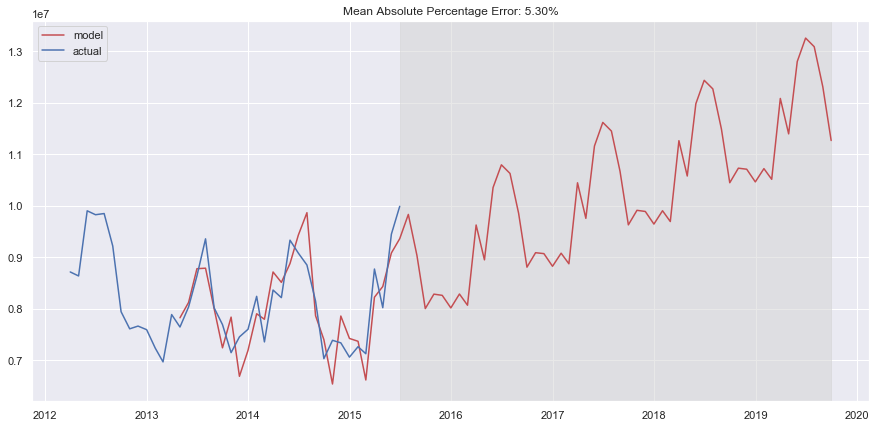

In [126]:
plotSARIMA(train, best_res, 50)

In [127]:
pred_seg_2 = fcast_arima.iloc[-12:]
pred_seg_2

2016-01-31   22273762.788
2016-02-29   21802714.431
2016-03-31   26705738.513
2016-04-30   23756494.423
2016-05-31   27872142.283
2016-06-30   29271002.135
2016-07-31   28485295.199
2016-08-31   26027151.578
2016-09-30   22684350.178
2016-10-31   23766853.724
2016-11-30   23602838.997
2016-12-31   23469261.084
Freq: M, dtype: float64

### Segment 3

In [128]:
train = monthly_new_3.loc[:'2015-07-01']
train.index = pd.to_datetime(train.index)
test = monthly_new_3.loc['2015-07-01':]
test.index = pd.to_datetime(test.index)
test.shape

(6, 1)

In [129]:
%%time
result_table = optimizeSARIMA(parameters_list, s)


CPU times: user 3min 15s, sys: 1.66 s, total: 3min 17s
Wall time: 2min 38s


In [130]:
# set the parameters that give the lowest AIC
p, d, q, P, D, Q = result_table.parameters[0]

best_mod=sm.tsa.statespace.SARIMAX(train.produce, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s))

best_res = best_mod.fit(disp=-1)
best_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                            produce   No. Observations:                   40
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -402.228
Date:                            Thu, 21 Mar 2019   AIC                            808.457
Time:                                    15:51:58   BIC                            811.048
Sample:                                03-31-2012   HQIC                           809.227
                                     - 06-30-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0463      0.110     -0.423      0.673      -0.261       0.168
sigma2      4.816e+11   8.42e-15   5.72e+25      0.000    4.82e+11    4.82e+11
===================================================================================
Ljung-Box (Q):                       30.97   Jarque-Bera (JB):                 1.86
Prob(Q):                              0.23   Prob(JB):                         0.40
Heteroskedasticity (H):               1.34   Skew:                            -0.04
Prob(H) (two-sided):                  0.67   Kurtosis:                         1.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.04e+41. Standard errors may be unstable.
"""

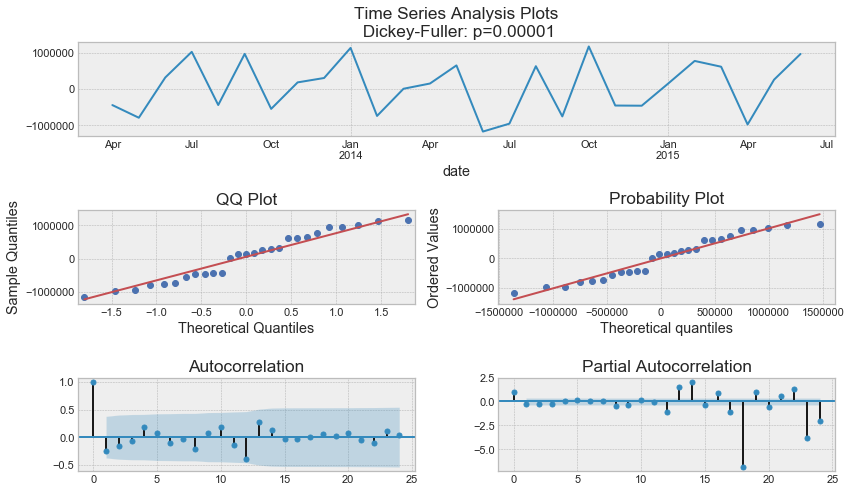

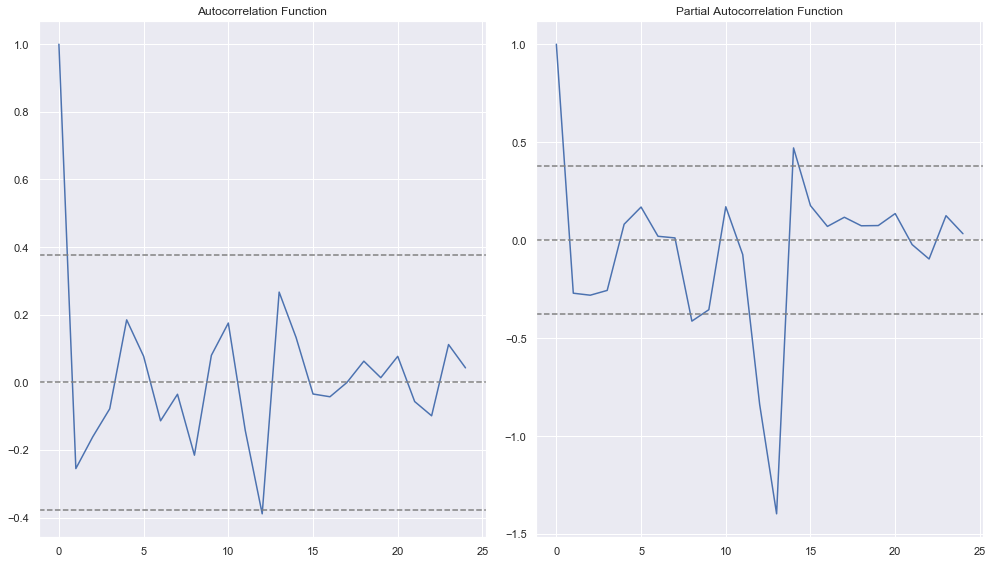

In [131]:
tsplot(best_res.resid[12+1:], lags=24)

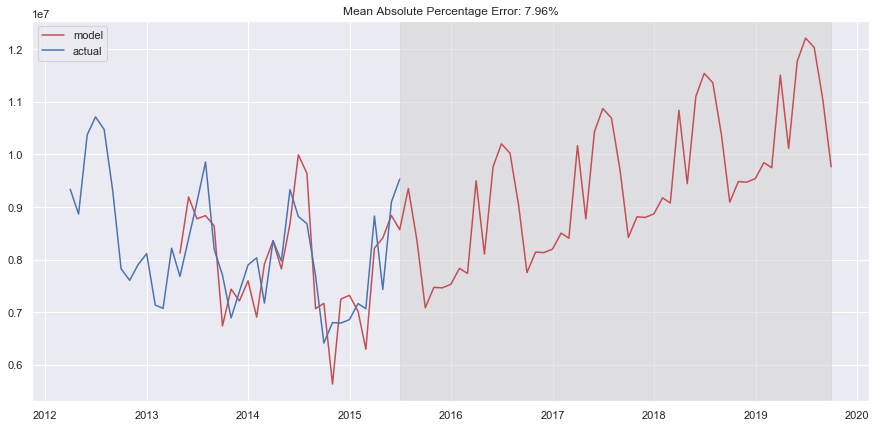

In [132]:
plotSARIMA(train, best_res, 50)

In [133]:
pred_seg_3 = fcast_arima.iloc[-12:]
pred_seg_3

2016-01-31   22273762.788
2016-02-29   21802714.431
2016-03-31   26705738.513
2016-04-30   23756494.423
2016-05-31   27872142.283
2016-06-30   29271002.135
2016-07-31   28485295.199
2016-08-31   26027151.578
2016-09-30   22684350.178
2016-10-31   23766853.724
2016-11-30   23602838.997
2016-12-31   23469261.084
Freq: M, dtype: float64

### Combine the segments

Recall that for existing stores, in cluster 1 there are 37 stores, in cluster 2 there are 33, and in cluster 3 there are 15 stores.

We need to divide the forecasts by these stores to get the average store produce sales.

Recall that for new stores, there are 6 stores in cluster 1, 4 stores in cluster 2 and 0 stores in cluster 3.

We need to multiply the average store produce sales with the number of stores that are in the clusters respectively.

In [134]:
avg_pred_seg_1 = pred_seg_1/37
avg_pred_seg_2 = pred_seg_2/22
avg_pred_seg_3 = pred_seg_3/15

In [135]:
fcast_seg_1 = avg_pred_seg_1*6
fcast_seg_2 = avg_pred_seg_2*4
fcast_seg_3 = avg_pred_seg_3*0

Now we are ready to sum the new stores produce sales forecast for each of the segments to get the forecast for all new stores, and then add the forecast of the existing stores to that sum, in order to get the total produce sales forecast. Woohoo!

In [136]:
fcast_new = fcast_seg_1 + fcast_seg_2 + fcast_seg_3
fcast_new = pd.DataFrame(fcast_new, columns=['produce'])
fcast_new.index.name = 'date'
fcast_new

,produce
date,
2016-01-31,7661736.586
2016-02-29,7499705.210
2016-03-31,9186249.120
2016-04-30,8171767.123
2016-05-31,9587469.090
2016-06-30,10068649.383
2016-07-31,9798381.641
2016-08-31,8952828.553
2016-09-30,7802970.577


In [137]:
fcast_exist = pd.DataFrame(fcast_exist, columns=['produce'])
fcast_exist.index.name = 'date'
fcast_exist

,produce
date,
2016-01-31,22273762.788
2016-02-29,21802714.431
2016-03-31,26705738.513
2016-04-30,23756494.423
2016-05-31,27872142.283
2016-06-30,29271002.135
2016-07-31,28485295.199
2016-08-31,26027151.578
2016-09-30,22684350.178


In [138]:
fcast_new + fcast_exist

,produce
date,
2016-01-31,29935499.374
2016-02-29,29302419.640
2016-03-31,35891987.633
2016-04-30,31928261.546
2016-05-31,37459611.373
2016-06-30,39339651.518
2016-07-31,38283676.839
2016-08-31,34979980.130
2016-09-30,30487320.755


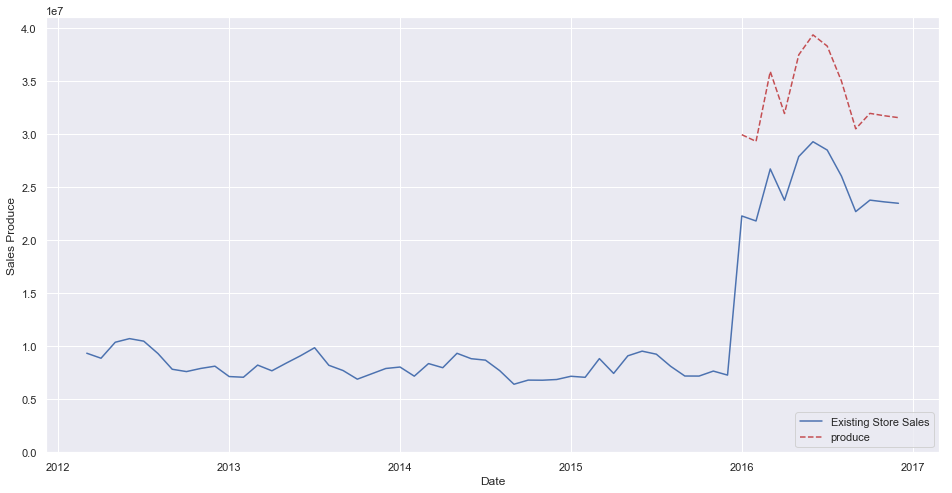

In [139]:
# Graph
fig, ax = plt.subplots(figsize=(16,8))

# Plot data points
comb = train.append(test).append(fcast_exist)
comb.produce.plot(ax=ax, style='-', label='Existing Store Sales')

# Plot predictions
(fcast_exist+fcast_new).plot(ax=ax, style='r--', label='New Store Sales')

legend = ax.legend(loc='lower right')
plt.xlabel('Date') , plt.ylabel('Sales Produce')
ax.set_ylim(bottom=0)
plt.show()

## Task 3 Submission

1. What type of ETS or ARIMA model did you use for each forecast? Use ETS(a,m,n) or ARIMA(ar, i, ma) notation. How did you come to that decision?
2. Please provide a table of your forecasts for existing and new stores. Also, provide visualization of your forecasts that includes historical data, existing stores forecasts, and new stores forecasts.